<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек,-объявление-функций-и-глобальных-переменных" data-toc-modified-id="Импорт-библиотек,-объявление-функций-и-глобальных-переменных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек, объявление функций и глобальных переменных</a></span></li><li><span><a href="#Просмотр-данных" data-toc-modified-id="Просмотр-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Просмотр данных</a></span><ul class="toc-item"><li><span><a href="#Первичный-анализ" data-toc-modified-id="Первичный-анализ-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Первичный анализ</a></span></li><li><span><a href="#Отрисовка-топовых-графем" data-toc-modified-id="Отрисовка-топовых-графем-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Отрисовка топовых графем</a></span></li></ul></li><li><span><a href="#Процессинг-данных" data-toc-modified-id="Процессинг-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Процессинг данных</a></span></li><li><span><a href="#Нейросетка" data-toc-modified-id="Нейросетка-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Нейросетка</a></span></li><li><span><a href="#Основной-расчет" data-toc-modified-id="Основной-расчет-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Основной расчет</a></span><ul class="toc-item"><li><span><a href="#Крутим-графемы" data-toc-modified-id="Крутим-графемы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Крутим графемы</a></span></li><li><span><a href="#Считаемся-на-одном-датасете" data-toc-modified-id="Считаемся-на-одном-датасете-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Считаемся на одном датасете</a></span></li></ul></li><li><span><a href="#Используем-чужую-сетку" data-toc-modified-id="Используем-чужую-сетку-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Используем чужую сетку</a></span><ul class="toc-item"><li><span><a href="#Препроцессим-данные:-уменьшаем-и-инвертируем-картинки" data-toc-modified-id="Препроцессим-данные:-уменьшаем-и-инвертируем-картинки-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Препроцессим данные: уменьшаем и инвертируем картинки</a></span><ul class="toc-item"><li><span><a href="#Попробовать-их-попереворачивать-сразу?" data-toc-modified-id="Попробовать-их-попереворачивать-сразу?-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Попробовать их попереворачивать сразу?</a></span></li></ul></li></ul></li><li><span><a href="#Проверка-переполнения-памяти" data-toc-modified-id="Проверка-переполнения-памяти-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Проверка переполнения памяти</a></span><ul class="toc-item"><li><span><a href="#Последовательно" data-toc-modified-id="Последовательно-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Последовательно</a></span></li></ul></li><li><span><a href="#Попробовать-Mish()-активацию" data-toc-modified-id="Попробовать-Mish()-активацию-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Попробовать Mish() активацию</a></span></li><li><span><a href="#Попробовать-уже-натренированную-модель" data-toc-modified-id="Попробовать-уже-натренированную-модель-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Попробовать уже натренированную модель</a></span></li><li><span><a href="#Попробовать-клонировать-слои-в-3х-мерный-вид" data-toc-modified-id="Попробовать-клонировать-слои-в-3х-мерный-вид-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Попробовать клонировать слои в 3х мерный вид</a></span></li><li><span><a href="#Попробовать-Слои-внимания" data-toc-modified-id="Попробовать-Слои-внимания-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Попробовать Слои внимания</a></span></li><li><span><a href="#Дебаг-через-класс" data-toc-modified-id="Дебаг-через-класс-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Дебаг через класс</a></span></li><li><span><a href="#Предсказание" data-toc-modified-id="Предсказание-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Предсказание</a></span></li></ul></div>

# Импорт библиотек, объявление функций и глобальных переменных

In [1]:
%pylab inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
#import tqdm
import gc
gc.enable()
import os
import sys
import graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import tensorflow as tf
import tensorflow_hub as tf_hub
import tensorflow_addons as tf_ad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn
from sklearn import *

import matplotlib.pylab as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont

from numba import jit, njit

Populating the interactive namespace from numpy and matplotlib


Была идея, что из-за использования методов tensorflow напрямую из основного модуля происходит переполнение оперативной памяти.
Проблему решил двумя способами:
1. Осуществлил импорт всех используемых методов и классов из tensorflow предварительно (особенно это касается ImageDataGenerator, т.к. его наследовать после импорта);
2. Выполнил очистку сессии от керас снизу.

In [2]:
tf.keras.backend.clear_session()

NameError: name 'tf' is not defined

In [3]:
path = r'D:\Python\Kaggle\Bengali\\'
train_path = r'D:\Python\Kaggle\Bengali\train\\'

random_state = 0

IMG_SIZE = 64
N_CHANNELS = 1

global HEIGHT
global WIDTH

HEIGHT = 137
WIDTH = 236

SCALE_FACTOR = 1.
HEIGHT_NEW = int(HEIGHT * SCALE_FACTOR)
WIDTH_NEW = int(WIDTH * SCALE_FACTOR)

BATCH_SIZE = 56
CHANNELS = 3
EPOCHS = 80
TEST_SIZE = 1./6

CROP_SIZE = 100
DATA_TYPE = np.float64

In [4]:
print(HEIGHT_NEW)
print(WIDTH_NEW)

137
236


In [5]:
np.random.seed(random_state)
tf.random.set_seed(random_state)

NameError: name 'tf' is not defined

In [6]:
# функция для расчета макро полноты
@jit
def recall_macro(df_true, df_pred):
    scores = []
    
    for component in ['grapheme_root', 'consonant_diacritic', 'vowel_diacritic']:
        
        y_true_subset = df_true[df_true['component']==component]['target'].to_numpy()
        y_pred_subset = df_pred[df_pred['component']==component]['target'].to_numpy()
        
        scores.append(sklearn.metrics.recall(y_true_subset, y_pred_subset, average='macro'))
        
    return np.average(score, weights=[2, 1, 1])

# функция для выбора топовых еироглифов
@jit
def get_n(df, field, n, top=True):
    top_graphemes = df.groupby([field]).size().reset_index(name='counts')['counts'].sort_values(ascending=not top)[:n]
    top_grapheme_roots = top_graphemes.index
    top_grapheme_counts = top_graphemes.values
    top_graphemes = class_map_df.iloc[top_grapheme_roots]
    top_graphemes.drop(['component_type', 'label'], axis=1, inplace=True)
    top_graphemes.loc[:, 'count'] = top_grapheme_counts
    return top_graphemes

# функция для отрисовки иероглифа из симпола графемы
def image_from_char(char):
    image = Image.new('RGB', (WIDTH, HEIGHT))
    draw = ImageDraw.Draw(image)
    myfont = ImageFont.truetype(path + 'kalpurush.ttf', 120)
    w, h = draw.textsize(char, font=myfont)
    draw.text(((WIDTH - w) / 2,(HEIGHT - h) / 3), char, font=myfont)

    return image

# функция для изменения размера всех картинок в датасете
@jit
def resize(df, size):
    
    resized = {}
    
    for i in range(df.shape[0]):
        
        image = cv2.resize(df.loc[df.index[i]].values.reshape(HEIGHT, WIDTH),(size, size))
        resized[df.index[i]] = image.reshape(-1)

    resized = pd.DataFrame(resized).T
    
    return resized

# функция для изменения размера конкретной картинки
@jit
def resize_image(img, org_width, org_height, new_width, new_height):
    
    # Invert
    img = 255 - img

    # Normalize
    img = (img * (255.0 / img.max())).astype(np.uint8)

    # Reshape
    img = img.reshape(org_height, org_width)
    image_resized = cv2.resize(img, (new_width, new_height), interpolation = cv2.INTER_AREA)

    return image_resized

@jit
def resize_and_save_image(train_dir, img, org_width, org_height, new_width, new_height, image_id):
    # Resize Image
    image_resized = resize_image(img, org_width, org_height, new_width, new_height)

    # Save Image
    cv2.imwrite(train_dir + str(image_id) + '.png', image_resized)

# функция для one-hot encoding разных классификаций
@jit
def get_dummies(df):
    cols = []
    for col in df:
        cols.append(pd.get_dummies(df[col].astype(str)))
    return pd.concat(cols, axis=1)

@jit
def crop_and_resize_images(df, resized_df, resize_size=CROP_SIZE):
    
    cropped_imgs = {}
    
    for img_id in range(df.shape[0]):
        
        img = resized_df[img_id]
        _, thresh = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        contours, _ = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
        
        idx = 0 
        ls_xmin = []
        ls_ymin = []
        ls_xmax = []
        ls_ymax = []
        
        for cnt in contours:
            
            idx += 1
            x,y,w,h = cv2.boundingRect(cnt)
            ls_xmin.append(x)
            ls_ymin.append(y)
            ls_xmax.append(x + w)
            ls_ymax.append(y + h)
            
        xmin = min(ls_xmin)
        ymin = min(ls_ymin)
        xmax = max(ls_xmax)
        ymax = max(ls_ymax)

        roi = img[ymin:ymax,xmin:xmax]
        resized_roi = cv2.resize(roi, (resize_size, resize_size))
        cropped_imgs[df.image_id[img_id]] = resized_roi.reshape(-1)
        
    resized = pd.DataFrame(cropped_imgs).T.reset_index()
    resized.columns = resized.columns.astype(str)
    resized.rename(columns={'index':'image_id'},inplace=True)
    
    return resized

# функция для отрисовки потерь
def plot_loss(his, epoch, title):
    real_epoch = len(his.history['root_accuracy'])
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, real_epoch), his.history['loss'], label='train_loss')
    plt.plot(np.arange(0, real_epoch), his.history['root_loss'], label='train_root_loss')
    plt.plot(np.arange(0, real_epoch), his.history['vowel_loss'], label='train_vowel_loss')
    plt.plot(np.arange(0, real_epoch), his.history['consonant_loss'], label='train_consonant_loss')
    
    plt.plot(np.arange(0, real_epoch), his.history['val_root_loss'], label='val_train_root_loss')
    plt.plot(np.arange(0, real_epoch), his.history['val_vowel_loss'], label='val_train_vowel_loss')
    plt.plot(np.arange(0, real_epoch), his.history['val_consonant_loss'], label='val_train_consonant_loss')
    
    plt.title(title)
    plt.xlabel('Epoch #')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

# функция для отрисовки точности
def plot_acc(his, epoch, title):
    real_epoch = len(his.history['root_accuracy'])
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, real_epoch), his.history['root_accuracy'], label='train_root_acc')
    plt.plot(np.arange(0, real_epoch), his.history['vowel_accuracy'], label='train_vowel_accuracy')
    plt.plot(np.arange(0, real_epoch), his.history['consonant_accuracy'], label='train_consonant_accuracy')
    
    plt.plot(np.arange(0, real_epoch), his.history['val_root_accuracy'], label='val_root_acc')
    plt.plot(np.arange(0, real_epoch), his.history['val_vowel_accuracy'], label='val_vowel_accuracy')
    plt.plot(np.arange(0, real_epoch), his.history['val_consonant_accuracy'], label='val_consonant_accuracy')
    plt.title(title)
    plt.xlabel('Epoch #')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()

In [7]:
#class MultiOutputDataGenerator(tf.keras.preprocessing.image.ImageDataGenerator):
class MultiOutputDataGenerator(ImageDataGenerator):

    def flow(
        self,
        x,
        y=None,
        batch_size=32,
        shuffle=True,
        sample_weight=None,
        seed=None,
        save_to_dir=None,
        save_prefix='',
        save_format='png',
        subset=None
    ):

        targets = None
        target_lengths = {}
        ordered_outputs = []
        
        for output, target in y.items():
            
            if targets is None:
                
                targets = target
                
            else:
                
                targets = np.concatenate((targets, target), axis=1)
                
            target_lengths[output] = target.shape[1]
            ordered_outputs.append(output)
        
            gc.collect()

        for flowx, flowy in super().flow(x, targets, batch_size=batch_size, shuffle=shuffle):
            
            target_dict = {}
            i = 0
            
            for output in ordered_outputs:
                
                target_length = target_lengths[output]
                target_dict[output] = flowy[:, i: i + target_length]
                i += target_length
                
                gc.collect()

            yield flowx, target_dict

# Просмотр данных

## Первичный анализ

In [7]:
train_df = pd.read_csv(path + 'train.csv')
test_df = pd.read_csv(path + 'test.csv')
class_map_df = pd.read_csv(path + 'class_map.csv')
sample_sub_df = pd.read_csv(path + 'sample_submission.csv')

In [9]:
# здесь находится идентификатор картинки, принадлежности к трем классификациям и графическое отображение

train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [10]:
# здесь идентификатор строки, картинки и для какой классификации необходимо предоставить прогноз

test_df.head()

,row_id,image_id,component
0,Test_0_consonant_diacritic,Test_0,consonant_diacritic
1,Test_0_grapheme_root,Test_0,grapheme_root
2,Test_0_vowel_diacritic,Test_0,vowel_diacritic
3,Test_1_consonant_diacritic,Test_1,consonant_diacritic
4,Test_1_grapheme_root,Test_1,grapheme_root


In [11]:
sample_sub_df.head()

,row_id,target
0,Test_0_consonant_diacritic,0
1,Test_0_grapheme_root,0
2,Test_0_vowel_diacritic,0
3,Test_1_consonant_diacritic,0
4,Test_1_grapheme_root,0


In [12]:
class_map_df.head()

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [13]:
print(f'Size of training data: {train_df.shape}')
print(f'Size of test data: {test_df.shape}')
print(f'Size of class map: {class_map_df.shape}')

Size of training data: (200840, 5)
Size of test data: (36, 3)
Size of class map: (186, 3)


In [14]:
print(f'Number of unique grapheme roots: {train_df["grapheme_root"].nunique()}')
print(f'Number of unique vowel diacritic: {train_df["vowel_diacritic"].nunique()}')
print(f'Number of unique consonant diacritic: {train_df["consonant_diacritic"].nunique()}')

Number of unique grapheme roots: 168
Number of unique vowel diacritic: 11
Number of unique consonant diacritic: 7


## Отрисовка топовых графем

In [15]:
top_10_roots = get_n(train_df, 'grapheme_root', 10)
top_10_roots

,component,count
72,দ,5736
64,ত,5596
13,ক,5420
107,ব,5321
23,গ,5149
96,প,4926
113,ভ,4395
147,স,4392
133,শ,4374
115,ম,4015


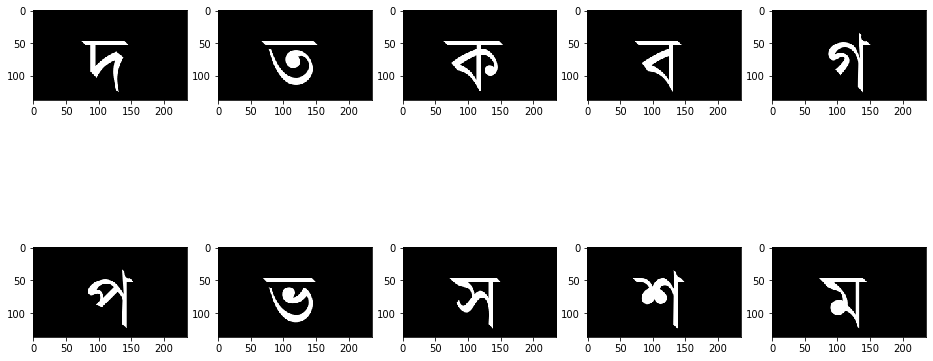

In [16]:
f, ax = plt.subplots(2, 5, figsize=(16, 8))
ax = ax.flatten()

for i in range(10):
    ax[i].imshow(image_from_char(top_10_roots['component'].iloc[i]), cmap='Greys')

In [17]:
bottom_10_roots = get_n(train_df, 'grapheme_root', 10, False)
bottom_10_roots

,component,count
73,দ্ঘ,130
33,ঙ্ক্ত,136
102,প্স,141
158,স্স,143
45,জ্জ্ব,144
130,ল্ব,144
1,ঃ,145
12,ঔ,146
0,ং,147
63,ণ্ণ,149


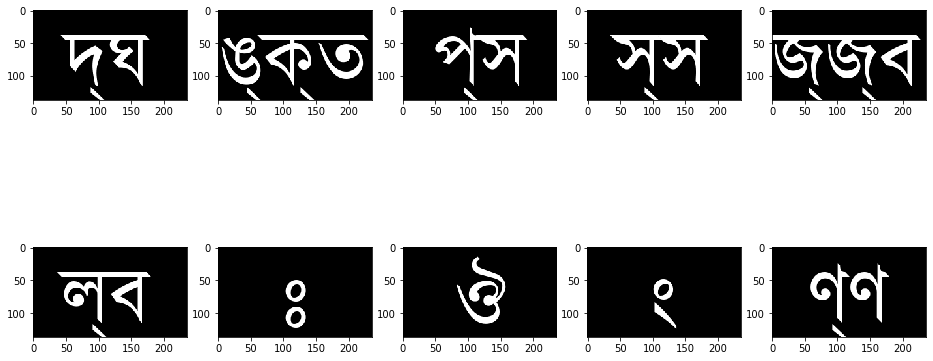

In [18]:
f, ax = plt.subplots(2, 5, figsize=(16, 8))
ax = ax.flatten()

for i in range(10):
    ax[i].imshow(image_from_char(bottom_10_roots['component'].iloc[i]), cmap='Greys')

In [19]:
top_5_vowels = get_n(train_df, 'vowel_diacritic', 5)
top_5_vowels

,component,count
0,ং,41508
1,ঃ,36886
7,ঊ,28723
2,অ,25967
4,ই,18848


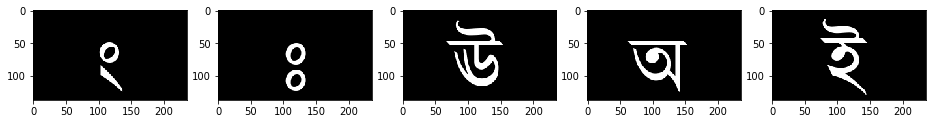

In [20]:
f, ax = plt.subplots(1, 5, figsize=(16, 8))
ax = ax.flatten()

for i in range(5):
    ax[i].imshow(image_from_char(top_5_vowels['component'].iloc[i]), cmap='Greys')

In [21]:
top_5_consonant = get_n(train_df, 'consonant_diacritic', 5)
top_5_consonant

,component,count
0,ং,125278
2,অ,23465
5,ঈ,21397
4,ই,21270
1,ঃ,7424


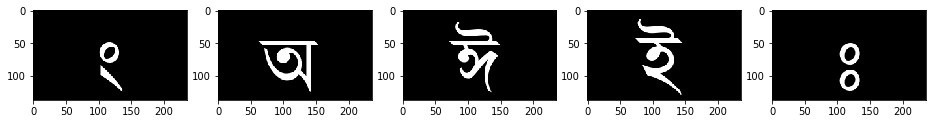

In [22]:
f, ax = plt.subplots(1, 5, figsize=(16, 8))
ax = ax.flatten()

for i in range(5):
    ax[i].imshow(image_from_char(top_5_consonant['component'].iloc[i]), cmap='Greys')

# Процессинг данных

df_full = pd.DataFrame()
df_full_crop = pd.DataFrame()

for i in  range(4):
    
    df = pd.read_parquet(f'\\\\FLAT\\d$\\Python\\Kaggle\\Bengali\\train_image_data_{i}.parquet')
    df.to_feather(f'\\\\FLAT\\d$\\Python\\Kaggle\\Bengali\\train_image_data_{i}.fth')
    
    df_resized = df.iloc[:, 1:].values.reshape(-1, HEIGHT, WIDTH)
    df_crop = crop_and_resize_images(df, df_resized)
    df_crop.to_feather(f'\\\\FLAT\\d$\\Python\\Kaggle\\Bengali\\train_image_data_crop_{i}.fth')
    
    df_full = pd.concat(objs=[df_full, df])
    df_full_crop = pd.concat(objs=[df_full_crop, df_crop])
    
df_full.reset_index(drop=True).to_feather('\\\\FLAT\\d$\\Python\\Kaggle\\Bengali\\train_image_data_full.fth')
df_full_crop.reset_index(drop=True).to_feather('\\\\FLAT\\d$\\Python\\Kaggle\\Bengali\\train_image_data_full_crop.fth')

del df
del df_resized
del df_crop
del df_full
del df_full_crop

gc.collect()

In [8]:
df_0 = pd.read_feather('\\\\FLAT\\d$\\Python\\Kaggle\\Bengali\\train_image_data_0.fth')
df_1 = pd.read_feather('\\\\FLAT\\d$\\Python\\Kaggle\\Bengali\\train_image_data_1.fth')
df_2 = pd.read_feather('\\\\FLAT\\d$\\Python\\Kaggle\\Bengali\\train_image_data_2.fth')
df_3 = pd.read_feather('\\\\FLAT\\d$\\Python\\Kaggle\\Bengali\\train_image_data_3.fth')

# Нейросетка

In [24]:
# https://androidkt.com/resnet-implementation-in-tensorflow-keras/

def conv_block(input_tensor, kernel_size, strides, filters):
    
    filter_1, filter_2, filter_3 = filters
    
    model = tf.keras.layers.Conv2D(
        filters=filter_1,
        kernel_size=kernel_size,
        strides=strides,
        padding='SAME',
        activation=None,
        kernel_initializer='he_normal',
        input_shape=(IMG_SIZE, IMG_SIZE, 1)
    )(input_tensor)

    model = tf.keras.layers.BatchNormalization(
        momentum=.15
    )(model)

    model = tf.keras.layers.Activation(
        activation=tf.keras.activations.relu
    )(model)
    
    model = tf.keras.layers.Conv2D(
        filters=filter_2,
        kernel_size=kernel_size,
        strides=strides,
        padding='SAME',
        activation=None,
        kernel_initializer='he_normal',
        input_shape=(IMG_SIZE, IMG_SIZE, 1)
    )(input_tensor)

    model = tf.keras.layers.BatchNormalization(
        momentum=.15
    )(model)

    model = tf.keras.layers.Activation(
        activation=tf.keras.activations.relu
    )(model)

    model = tf.keras.layers.Conv2D(
        filters=filter_3,
        kernel_size=kernel_size,
        strides=strides,
        padding='SAME',
        activation=None,
        kernel_initializer='he_normal',
        input_shape=(IMG_SIZE, IMG_SIZE, 1)
    )(model)

    model = tf.keras.layers.BatchNormalization(
        momentum=.15
    )(model)

    shortcut = tf.keras.layers.Conv2D(
        filters=filter_3,
        kernel_size=kernel_size,
        strides=strides,
        padding='SAME',
        activation=None,
        kernel_initializer='he_normal',
        input_shape=(IMG_SIZE, IMG_SIZE, 1)
    )(input_tensor)

    shortcut = tf.keras.layers.BatchNormalization(
        momentum=.15
    )(shortcut)

    model = tf.keras.layers.add(
        inputs=[model, shortcut] # size should be equal
    )

    model = tf.keras.layers.Activation(
        activation=tf.keras.activations.relu
    )(model)
    
    return model

def identity_block(input_tensor, kernel_size, strides, filters):
    
    filter_1, filter_2, filter_3 = filters
    
    model = tf.keras.layers.Conv2D(
        filters=filter_1,
        kernel_size=kernel_size,
        strides=strides,
        padding='SAME',
        activation=None,
        kernel_initializer='he_normal',
        input_shape=(IMG_SIZE, IMG_SIZE, 1)
    )(input_tensor)

    model = tf.keras.layers.BatchNormalization(
        momentum=.15
    )(model)

    model = tf.keras.layers.Activation(
        activation=tf.keras.activations.relu
    )(model)
    
    model = tf.keras.layers.Conv2D(
        filters=filter_2,
        kernel_size=kernel_size,
        strides=strides,
        padding='SAME',
        activation=None,
        kernel_initializer='he_normal',
        input_shape=(IMG_SIZE, IMG_SIZE, 1)
    )(input_tensor)

    model = tf.keras.layers.BatchNormalization(
        momentum=.15
    )(model)

    model = tf.keras.layers.Activation(
        activation=tf.keras.activations.relu
    )(model)

    model = tf.keras.layers.Conv2D(
        filters=filter_3,
        kernel_size=kernel_size,
        strides=strides,
        padding='SAME',
        activation=None,
        kernel_initializer='he_normal',
        input_shape=(IMG_SIZE, IMG_SIZE, 1)
    )(model)

    model = tf.keras.layers.BatchNormalization(
        momentum=.15
    )(model)

    model = tf.keras.layers.add(
        inputs=[model, input_tensor] # size should be equal
    )

    model = tf.keras.layers.Activation(
        activation=tf.keras.activations.relu
    )(model)
    
    return model

In [25]:
#have no enough gpu memory for bigger numbers...
batch_size = 256
epochs = 30

In [26]:
inputs = tf.keras.layers.Input(
    shape=(IMG_SIZE, IMG_SIZE, 1)
)

# first block
#########################################################################################################################
model = tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    strides=(2, 2),
    padding='SAME',
    activation=None,
    kernel_initializer='he_normal',
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(inputs)

model = tf.keras.layers.BatchNormalization(
    momentum=.15
)(model)

model = tf.keras.layers.Activation(
    activation=tf.keras.activations.relu
)(model)

model = tf.keras.layers.MaxPool2D(
    pool_size=(3, 3),
    strides=(2, 2)
)(model)

model = tf.keras.layers.Dropout(
    rate=.3
)(model)

# convolutional block
#########################################################################################################################
model = conv_block(model, (3, 3), (1, 1), [32, 32, 64])
model = tf.keras.layers.MaxPool2D(
    pool_size=(1, 1),
    strides=None
)(model)

model = tf.keras.layers.Dropout(
    rate=.3
)(model)

# identity block
#########################################################################################################################
model = identity_block(model, (3, 3), (1, 1), [32, 32, 64])
model = identity_block(model, (3, 3), (1, 1), [32, 32, 64])

model = tf.keras.layers.MaxPool2D(
    pool_size=(1, 1),
    strides=None
)(model)

model = tf.keras.layers.Dropout(
    rate=.3
)(model)

# fully connected block
#########################################################################################################################
model = tf.keras.layers.Flatten()(model)

model = tf.keras.layers.Dense(
    units=1024,
    activation=tf.keras.activations.relu
)(model)

model = tf.keras.layers.Dropout(
    rate=0.3
)(model)

# multiputput block
#########################################################################################################################
dense = tf.keras.layers.Dense(
    units=512,
    activation = tf.keras.activations.relu
)(model)

head_root = tf.keras.layers.Dense(
    units=168,
    activation=tf.keras.activations.softmax,
    name='root'
)(dense)

head_vowel = tf.keras.layers.Dense(
    units=11,
    activation=tf.keras.activations.softmax,
    name='vowel'
)(dense)

head_consonant = tf.keras.layers.Dense(
    units=7,
    activation=tf.keras.activations.softmax,
    name='consonant'
)(dense)

# final block
#########################################################################################################################
model = tf.keras.Model(
    inputs=inputs,
    outputs=[head_root, head_vowel, head_consonant]
)

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   1664        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

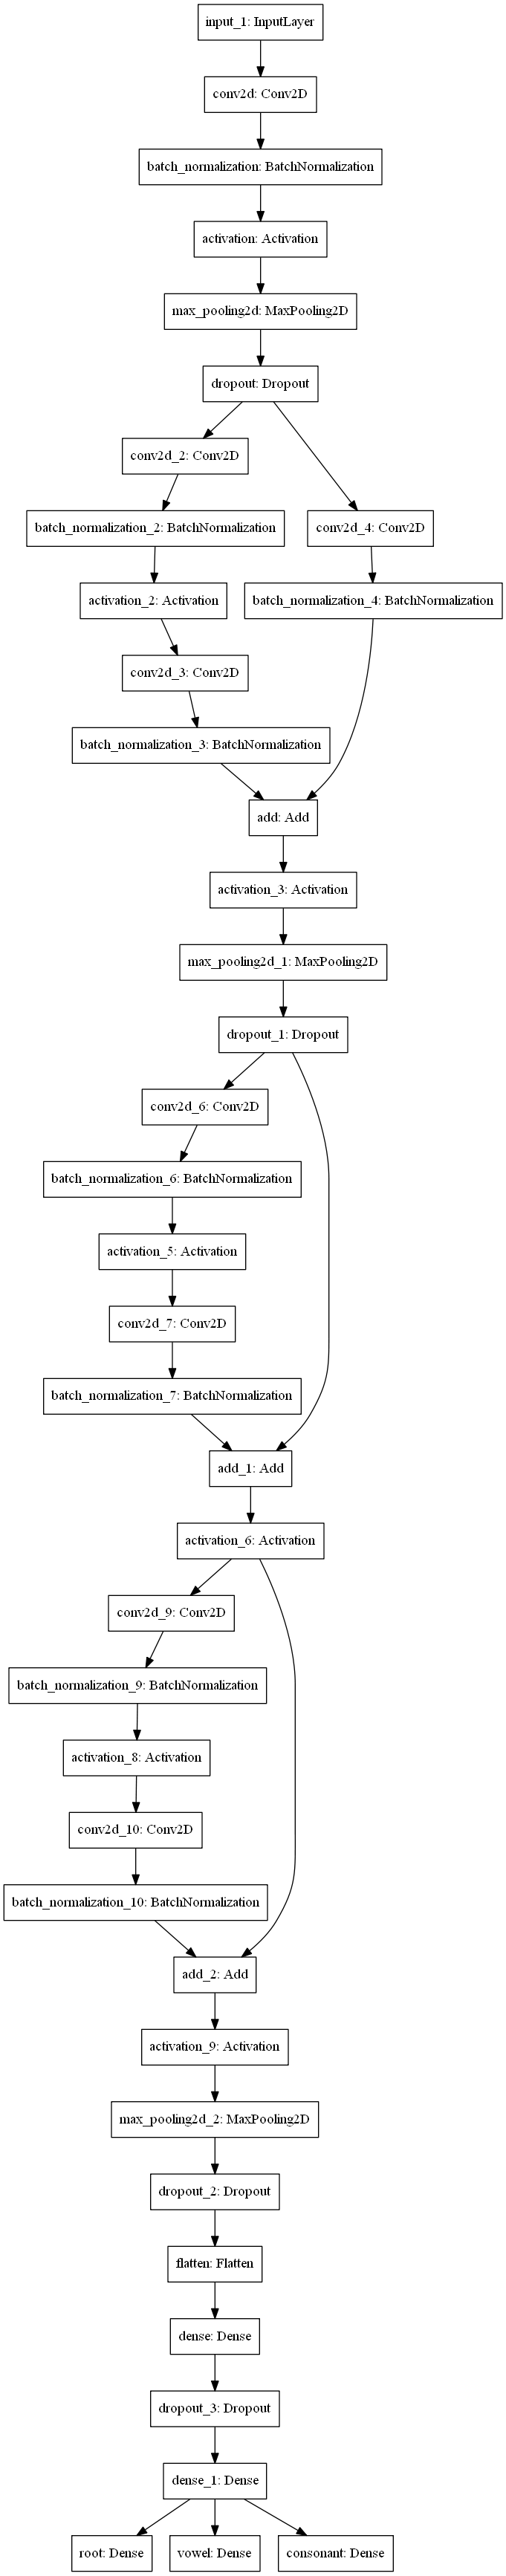

In [28]:
tf.keras.utils.plot_model(model, to_file='model.png')

In [29]:
batch_size = 256
epochs = 32

In [30]:
inputs = tf.keras.layers.Input(
    shape=(IMG_SIZE, IMG_SIZE, 1)
)

#########################################################################################################################
model = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='SAME',
    activation=tf.keras.activations.relu,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(inputs)

model = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='SAME',
    activation=tf.keras.activations.relu,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(model)

model = tf.keras.layers.BatchNormalization(
    momentum=.15
)(model)

model = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=None
)(model)

model = tf.keras.layers.Dropout(
    rate=.3
)(model)

#########################################################################################################################
model = tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='SAME',
    activation=tf.keras.activations.relu,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(model)

model = tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='SAME',
    activation=tf.keras.activations.relu,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(model)

model = tf.keras.layers.BatchNormalization(
    momentum=.15
)(model)

model = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=None
)(model)

model = tf.keras.layers.Dropout(
    rate=.3
)(model)

#########################################################################################################################
model = tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='SAME',
    activation=tf.keras.activations.relu,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(model)

model = tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='SAME',
    activation=tf.keras.activations.relu,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(model)

model = tf.keras.layers.BatchNormalization(
    momentum=.15
)(model)

model = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=None
)(model)

model = tf.keras.layers.Dropout(
    rate=.3
)(model)

#########################################################################################################################
model = tf.keras.layers.Flatten()(model)


model = tf.keras.layers.Dense(
    units=1024,
    activation=tf.keras.activations.relu
)(model)

model = tf.keras.layers.Dropout(
    rate=0.3
)(model)

#########################################################################################################################
dense = tf.keras.layers.Dense(
    units=512,
    activation = tf.keras.activations.relu
)(model)

head_root = tf.keras.layers.Dense(
    units=168,
    activation=tf.keras.activations.softmax,
    name='root'
)(dense)

head_vowel = tf.keras.layers.Dense(
    units=11,
    activation=tf.keras.activations.softmax,
    name='vowel'
)(dense)

head_consonant = tf.keras.layers.Dense(
    units=7,
    activation=tf.keras.activations.softmax,
    name='consonant'
)(dense)

#########################################################################################################################
model = tf.keras.Model(
    inputs=inputs,
    outputs=[head_root, head_vowel, head_consonant]
)

# val_root_accuracy: 0.9233 - val_vowel_accuracy: 0.9873 - val_consonant_accuracy: 0.9858
# total 0.954925

In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 64, 64, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 64, 64, 32)   9248        conv2d_11[0][0]                  
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 64, 64, 32)   128         conv2d_12[0][0]                  
____________________________________________________________________________________________

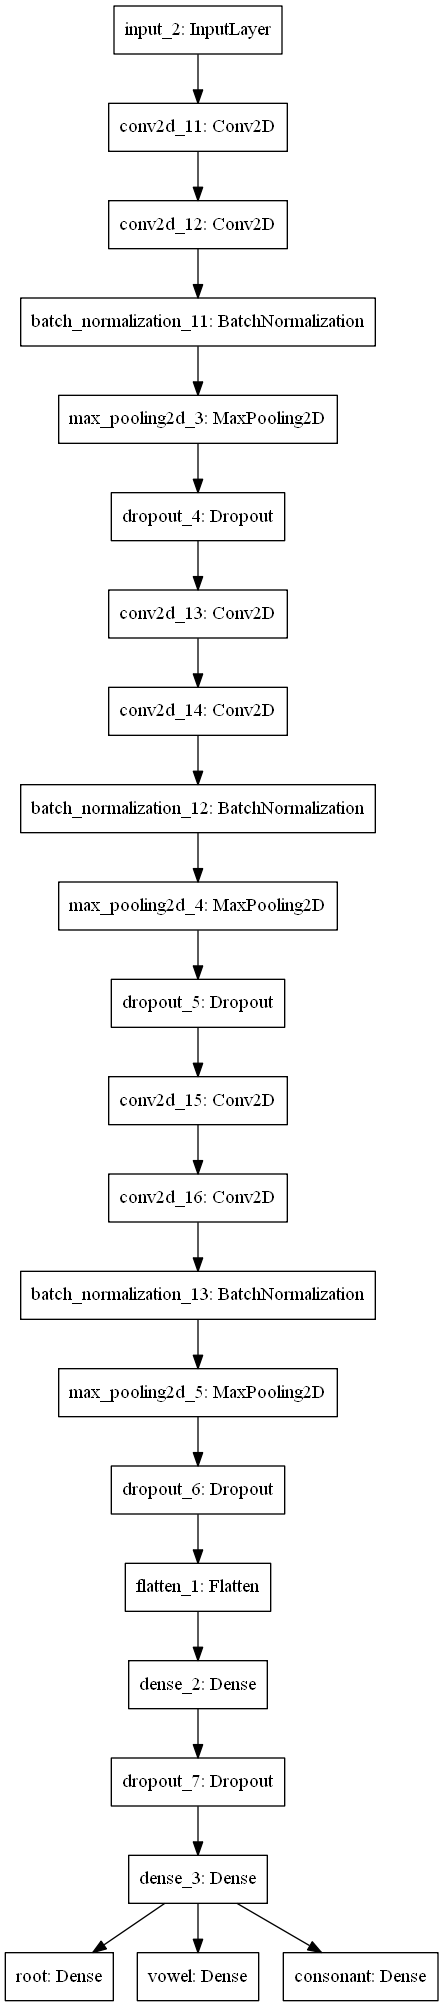

In [32]:
tf.keras.utils.plot_model(model, to_file='model.png')

In [33]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [34]:
callback_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=.5,
    patience=5,
    verbose=1,
    mode='auto',
    min_delta=.0001,
    cooldown=0,
    min_lr=.0001,
)

callback_es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

# Основной расчет

## Крутим графемы

In [9]:
train_df = train_df.drop(['grapheme'], axis=1, inplace=False)

train_df[['grapheme_root', 'vowel_diacritic', 'consonant_diacritic']] = \
train_df[['grapheme_root', 'vowel_diacritic', 'consonant_diacritic']].astype('uint8')

In [36]:
X_train = pd.merge(
    df_0,
    train_df,
    on='image_id'
).drop(
    labels=['image_id'],
    axis=1
)

train_df = train_df.head(100000)

In [37]:
img = X_train.drop(labels=['grapheme_root','vowel_diacritic', 'consonant_diacritic'], axis=1).iloc[[0]]
img

,0,1,2,3,4,5,6,7,8,9,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,254,253,252,253,251,252,253,251,251,253,...,253,253,253,253,253,253,253,253,253,251


In [38]:
#размер картинки изначальный

137*236

32332

In [39]:
img = resize(img, size=IMG_SIZE)
img

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,253,252,253,253,254,253,253,253,253,253,...,252,252,252,252,253,253,253,253,253,253


In [40]:
# размер картинки после преобразования

IMG_SIZE * IMG_SIZE

4096

In [41]:
img /= 255

In [42]:
img = img.to_numpy()
img

array([[0.99215686, 0.98823529, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686]])

In [43]:
img.shape

(1, 4096)

In [44]:
cmaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges',
         'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu',
         'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

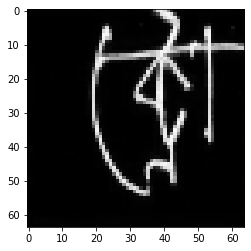

In [45]:
plt.imshow(
    X=img.reshape(IMG_SIZE, IMG_SIZE).astype(DATA_TYPE),
    cmap='Greys'
)

In [46]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=.1, # Randomly zoom image 
    width_shift_range=.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False  # randomly flip images
)

# This will just calculate parameters required to augment the given data. This won't perform any augmentations
datagen.fit(img.reshape(-1, IMG_SIZE, IMG_SIZE, N_CHANNELS))

In [47]:
for i in datagen.flow(
    img.reshape(-1, IMG_SIZE, IMG_SIZE, N_CHANNELS),
    None,
    batch_size=1
):
        break
        
img_processed = i[0].reshape(IMG_SIZE, IMG_SIZE).astype(DATA_TYPE)
img_processed

array([[1.        , 1.        , 1.        , ..., 1.        , 0.99589717,
        0.98823529],
       [1.        , 1.        , 1.        , ..., 1.        , 0.99707037,
        0.99192834],
       [1.        , 1.        , 1.        , ..., 1.        , 0.99699509,
        0.99215686],
       ...,
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686]])

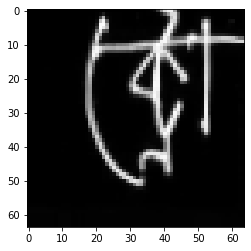

In [48]:
plt.imshow(
    X=img_processed,
    cmap='Greys'
)

## Считаемся на одном датасете

In [15]:
histories = []

# разворачиваем целевую переменную в одномерный массив, где 1 ставится только в нужном классе (168, 11 или 7)
Y_train_root = pd.get_dummies(X_train['grapheme_root']).values
Y_train_vowel = pd.get_dummies(X_train['vowel_diacritic']).values
Y_train_consonant = pd.get_dummies(X_train['consonant_diacritic']).values

X_train = X_train.drop(
    labels=['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'],
    axis=1
)
X_train = resize(X_train, size=IMG_SIZE)/255

# приводим к виду количество картинок * высота * ширина * количество каналов
X_train = X_train.values.reshape(-1, IMG_SIZE, IMG_SIZE, N_CHANNELS)
X_train = X_train.astype(DATA_TYPE)

print(f'Training images: {X_train.shape}')
print(f'Training labels root: {Y_train_root.shape}')
print(f'Training labels vowel: {Y_train_vowel.shape}')
print(f'Training labels consonants: {Y_train_consonant.shape}')

# Divide the data into training and validation set
x_train, x_test, y_train_root, y_test_root, y_train_vowel, y_test_vowel, y_train_consonant, y_test_consonant = \
sklearn.model_selection.train_test_split(
    X_train,
    Y_train_root,
    Y_train_vowel,
    Y_train_consonant,
    test_size=.08,
    random_state=0
)

del X_train
del Y_train_root
del Y_train_vowel
del Y_train_consonant

gc.collect()

datagen = MultiOutputDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=.15, # Randomly zoom image 
    width_shift_range=.15,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=.15,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False  # randomly flip images
)

# This will just calculate parameters required to augment the given data. This won't perform any augmentations
datagen.fit(x_train)

Training images: (50210, 64, 64, 1)
Training labels root: (50210, 168)
Training labels vowel: (50210, 11)
Training labels consonants: (50210, 7)


In [18]:
type(x_train[0][0][0][0])

numpy.float32

In [18]:
# Fit the model
history = model.fit(
    datagen.flow(
        x_train,
        {
            'root': y_train_root,
            'vowel': y_train_vowel,
            'consonant': y_train_consonant
        },
        batch_size=batch_size
    ),
    epochs=1,
    validation_data=(x_test, [y_test_root, y_test_vowel, y_test_consonant]),  
    steps_per_epoch=x_train.shape[0] // batch_size, 
    callbacks=[
        callback_lr,
        callback_es
    ]
)

histories.append(history)

W0205 21:25:12.967581  6732 data_adapter.py:1091] sample_weight modes were coerced from
  {'root': '...', 'vowel': '...', 'consonant': '...'}
    to  
  ['...', '...', '...']


Train for 180 steps, validate on 4017 samples
180/180 [==============================] - 45s 253ms/step - loss: 2.1840 - root_loss: 1.4691 - vowel_loss: 0.3834 - consonant_loss: 0.3316 - root_accuracy: 0.5726 - vowel_accuracy: 0.8708 - consonant_accuracy: 0.8871 - val_loss: 1.3126 - val_root_loss: 0.9176 - val_vowel_loss: 0.2146 - val_consonant_loss: 0.1798 - val_root_accuracy: 0.7254 - val_vowel_accuracy: 0.9228 - val_consonant_accuracy: 0.9440


# Используем чужую сетку

In [65]:
image_ids = df_0['image_id'].values 

df = df_0.drop(['image_id'], axis = 1)

In [66]:
image_ids

array(['Train_0', 'Train_1', 'Train_2', ..., 'Train_50207', 'Train_50208',
       'Train_50209'], dtype=object)

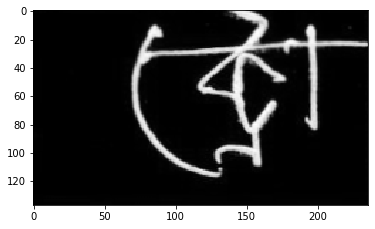

In [82]:
plt.imshow(
    X=df.loc[0].to_numpy().reshape(HEIGHT, WIDTH),
    cmap='Greys'
)

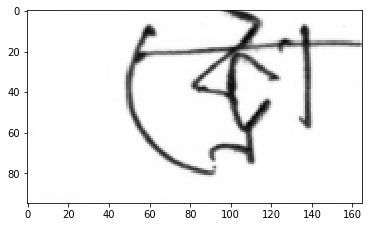

In [78]:
plt.imshow(
    X=resize_image(df.loc[0].to_numpy(), WIDTH, HEIGHT, WIDTH_NEW, HEIGHT_NEW),
    cmap='Greys'
)

In [75]:
resize_image(df.loc[0].to_numpy(), WIDTH, HEIGHT, WIDTH_NEW, HEIGHT_NEW)

(95, 165)

## Препроцессим данные: уменьшаем и инвертируем картинки

### Попробовать их попереворачивать сразу?

In [95]:
for df in [df_0, df_1, df_2, df_3]:

    # Get Image Id values
    image_ids = df['image_id'].values 
    # Drop Image_id column
    df = df.drop(['image_id'], axis = 1)

    # Loop over rows in Dataframe and generate images 
    for image_id, index in zip(image_ids, range(df.shape[0])):
        
        resize_and_save_image(
            train_dir=train_path,
            img=df.loc[df.index[index]].to_numpy(),
            org_width=WIDTH,
            org_height=HEIGHT,
            new_width=WIDTH_NEW,
            new_height=HEIGHT_NEW,
            image_id=image_id
        )

    # Cleanup
    del df
    gc.collect()
    
    print('Done')

KeyboardInterrupt: 

In [10]:
train_df = pd.read_csv(path + 'train.csv')

In [11]:
tgt_cols = ['grapheme_root', 'vowel_diacritic', 'consonant_diacritic']

desc_df = train_df[tgt_cols].astype('str').describe()
types = desc_df.loc['unique', :]

X_train = train_df['image_id'].values
train_df = train_df[tgt_cols].astype('uint8')

for col in tgt_cols:
    train_df[col] = train_df[col].map('{:03}'.format)
    
Y_train = pd.get_dummies(train_df)

In [12]:
Y_train

,grapheme_root_000,grapheme_root_001,grapheme_root_002,grapheme_root_003,grapheme_root_004,grapheme_root_005,grapheme_root_006,grapheme_root_007,grapheme_root_008,grapheme_root_009,...,vowel_diacritic_008,vowel_diacritic_009,vowel_diacritic_010,consonant_diacritic_000,consonant_diacritic_001,consonant_diacritic_002,consonant_diacritic_003,consonant_diacritic_004,consonant_diacritic_005,consonant_diacritic_006
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
200836,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
200837,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
200838,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [13]:
def ModelCheckpointFull(model_name):
    
    return tf.keras.callbacks.ModelCheckpoint(
        model_name, 
        monitor = 'val_loss', 
        verbose = 1, 
        save_best_only = False, 
        save_weights_only = True, 
        mode = 'min', 
        period = 1
    )

In [14]:
def _read(path):
    img = cv2.imread(path)    
    return img

In [15]:
import keras
import keras.backend as K
import efficientnet.keras as efn
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold, MultilabelStratifiedShuffleSplit

Using TensorFlow backend.


In [16]:
class TrainDataGenerator(keras.utils.Sequence):
    
    def __init__(self, X_set, Y_set, ids, batch_size=16, img_size=(512, 512, 3), img_dir=train_path, *args, **kwargs):
        self.X = X_set
        self.ids = ids
        self.Y = Y_set
        self.batch_size = batch_size
        self.img_size = img_size
        self.img_dir = img_dir
        self.on_epoch_end()

        # Split Data
        self.x_indexed = self.X[self.ids]
        self.y_indexed = self.Y.iloc[self.ids]

        # Prep Y per Label   
        self.y_root = self.y_indexed.iloc[:,0:types['grapheme_root']]
        self.y_vowel = self.y_indexed.iloc[:,types['grapheme_root']:types['grapheme_root']+types['vowel_diacritic']]
        self.y_consonant = self.y_indexed.iloc[:,types['grapheme_root']+types['vowel_diacritic']:]
    
    def __len__(self):
        return int(ceil(len(self.ids) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        X, Y_root, Y_vowel, Y_consonant = self.__data_generation(indices)
        return X, {'root': Y_root, 'vowel': Y_vowel, 'consonant': Y_consonant}

    def on_epoch_end(self):
        self.indices = np.arange(len(self.ids))
    
    def __data_generation(self, indices):
        X = np.empty((self.batch_size, *self.img_size))
        Y_root = np.empty((self.batch_size, 168), dtype = np.int16)
        Y_vowel = np.empty((self.batch_size, 11), dtype = np.int16)
        Y_consonant = np.empty((self.batch_size, 7), dtype = np.int16)

        for i, index in enumerate(indices):
            ID = self.x_indexed[index]
            image = _read(self.img_dir+ID+".png")
            
            X[i,] = image
            
            Y_root[i,] = self.y_root.iloc[index].values
            Y_vowel[i,] = self.y_vowel.iloc[index].values
            Y_consonant[i,] = self.y_consonant.iloc[index].values    
       
        return X, Y_root, Y_vowel, Y_consonant 

In [17]:
inputs = keras.models.Input(
    shape=(HEIGHT_NEW, WIDTH_NEW, CHANNELS)
)

In [18]:
model = efn.EfficientNetB3(
    weights='imagenet',
    include_top=False,
    input_tensor=inputs,
    pooling=None,
    classes=None
)

In [19]:
# UnFreeze all layers
for layer in model.layers:
    
    layer.trainable = True

In [20]:
gm_exp = tf.Variable(3.0, dtype = tf.float32)

def generalized_mean_pool_2d(X):
    
    pool = (tf.reduce_mean(tf.abs(X**(gm_exp)), 
                        axis = [1, 2], 
                        keepdims = False) + 1.e-7)**(1./gm_exp)
    return pool

NameError: name 'tf' is not defined

In [ ]:
# GeM
lambda_layer = keras.layers.Lambda(generalized_mean_pool_2d)
lambda_layer.trainable_weights.extend([gm_exp])
x = lambda_layer(model.output)

In [ ]:
# multi output
grapheme_root = keras.layers.Dense(168, activation = 'softmax', name = 'root')(x)
vowel_diacritic = keras.layers.Dense(11, activation = 'softmax', name = 'vowel')(x)
consonant_diacritic = keras.layers.Dense(7, activation = 'softmax', name = 'consonant')(x)

In [ ]:
# model
model = keras.models.Model(
    inputs=model.input,
    outputs=[grapheme_root, vowel_diacritic, consonant_diacritic]
)

In [ ]:
# Compile Model
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.00016),
                loss = {'root': 'categorical_crossentropy',
                        'vowel': 'categorical_crossentropy',
                        'consonant': 'categorical_crossentropy'},
                loss_weights = {'root': 0.40,        
                                'vowel': 0.30,
                                'consonant': 0.30},
                metrics = {'root': ['accuracy', tf.keras.metrics.Recall()],
                            'vowel': ['accuracy', tf.keras.metrics.Recall()],
                            'consonant': ['accuracy', tf.keras.metrics.Recall()] })

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png')

In [ ]:
msss = MultilabelStratifiedShuffleSplit(
    n_splits=EPOCHS,
    test_size=TEST_SIZE,
    random_state=random_state
)

In [ ]:
best_val_loss = np.Inf

In [ ]:
def CustomReduceLRonPlateau(model, history, epoch):
    global best_val_loss
    
    # ReduceLR Constants
    monitor = 'val_root_loss'
    patience = 5
    factor = 0.75
    min_lr = 1e-5

    # Get Current LR
    current_lr = float(K.get_value(model.optimizer.lr))
    
    # Print Current Learning Rate
    print('Current LR: {0}'.format(current_lr))

    # Monitor Best Value
    current_val_loss = history[monitor][-1]
    if current_val_loss < best_val_loss:
        best_val_loss = current_val_loss
    print('Best Vall Loss: {0}'.format(best_val_loss))

    # Track last values
    if len(history[monitor]) >= patience:
        last5 = history[monitor][-5:]
        print('Last: {0}'.format(last5))
        best_in_last = min(last5)
        print('Min value in Last: {0}'.format(best_in_last))

        # Determine correction
        if best_val_loss < best_in_last:
            new_lr = current_lr * factor
            if new_lr < min_lr:
                new_lr = min_lr
            print('ReduceLRonPlateau setting learning rate to: {0}'.format(new_lr))
            K.set_value(model.optimizer.lr, new_lr)

In [82]:
history = {}

for epoch, msss_splits in zip(range(0, EPOCHS), msss.split(X_train, Y_train)):
    
    print('=========== EPOCH {}'.format(epoch))

    # Get train and test index, shuffle train indexes.
    train_idx = msss_splits[0]
    valid_idx = msss_splits[1]
    np.random.shuffle(train_idx)
    print('Train Length: {0}   First 10 indices: {1}'.format(len(train_idx), train_idx[:10]))    
    print('Valid Length: {0}    First 10 indices: {1}'.format(len(valid_idx), valid_idx[:10]))

    # Create Data Generators for Train and Valid
    data_generator_train = TrainDataGenerator(X_train, 
                                            Y_train,
                                            train_idx, 
                                            BATCH_SIZE, 
                                            (HEIGHT_NEW, WIDTH_NEW, CHANNELS),
                                            img_dir = train_path)
    data_generator_val = TrainDataGenerator(X_train, 
                                            Y_train,
                                            valid_idx,
                                            BATCH_SIZE, 
                                            (HEIGHT_NEW, WIDTH_NEW, CHANNELS),
                                            img_dir = train_path)

    TRAIN_STEPS = int(len(data_generator_train))
    VALID_STEPS = int(len(data_generator_val))
    print('Train Generator Size: {0}'.format(len(data_generator_train)))
    print('Validation Generator Size: {0}'.format(len(data_generator_val)))
    
    model.fit_generator(generator = data_generator_train,
                        validation_data = data_generator_val,
                        steps_per_epoch = TRAIN_STEPS,
                        validation_steps = VALID_STEPS,
                        epochs = 1,
                        callbacks = [ModelCheckpointFull('model_' + str(epoch) + '.h5')],
                        verbose = 1)

    # Set and Concat Training History
    temp_history = model.history.history
    if epoch == 0:
        history = temp_history
    else:
        for k in temp_history: history[k] = history[k] + temp_history[k]

    # Custom ReduceLRonPlateau
    CustomReduceLRonPlateau(model, history, epoch)

    # Cleanup
    del data_generator_train, data_generator_val, train_idx, valid_idx
    gc.collect()

W0304 00:16:00.376939 11276 callbacks.py:886] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


=========== EPOCH 0
Train Length: 167329   First 10 indices: [ 29879 103135  48398 170489  77341  90591  85400  40150  38517  17632]
Valid Length: 33511    First 10 indices: [10 22 27 30 55 58 59 74 86 93]
Train Generator Size: 2989
Validation Generator Size: 599


AttributeError: 'Model' object has no attribute '_in_multi_worker_mode'

In [ ]:
model.fit_generator(generator = data_generator_train,
                    validation_data = data_generator_val,
                    steps_per_epoch = TRAIN_STEPS,
                    validation_steps = VALID_STEPS,
                    epochs = 1,
                    #callbacks = [ModelCheckpointFull('model_' + str(epoch) + '.h5')],
                    verbose = 1)

Epoch 1/1


In [55]:
import efficientnet.keras as efn

In [56]:
input_shape = (HEIGHT, WIDTH, 3)

In [57]:
model = efn.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

16809984/16804768 [==============================] - 5s 0us/step


In [58]:
for layer in model.layers:
    
    layer.trainable = True

In [60]:
model.summary()

Model: "efficientnet-b0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 137, 236, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 69, 118, 32)  864         input_3[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 69, 118, 32)  128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 69, 118, 32)  0           stem_bn[0][0]                    
____________________________________________________________________________________

# Проверка переполнения памяти

In [18]:
from memory_profiler import profile

%load_ext memory_profiler

def main():
    
    model.fit(
        datagen.flow(
            x_train,
            {
                'root': y_train_root,
                'vowel': y_train_vowel,
                'consonant': y_train_consonant
            },
            batch_size=batch_size
        ),
        epochs=1,
        validation_data=(x_test, [y_test_root, y_test_vowel, y_test_consonant]),  
        steps_per_epoch=x_train.shape[0] // batch_size, 
        callbacks=[
            callback_lr,
            callback_es
        ]
    )
    
    gc.collect()

In [20]:
%memit main()

W0123 22:24:11.979885  9340 data_adapter.py:1091] sample_weight modes were coerced from
  {'root': '...', 'vowel': '...', 'consonant': '...'}
    to  
  ['...', '...', '...']


Train for 180 steps, validate on 4017 samples
180/180 [==============================] - 45s 250ms/step - loss: 6.7456 - root_loss: 4.5452 - vowel_loss: 1.1891 - consonant_loss: 1.0113 - root_accuracy: 0.0392 - vowel_accuracy: 0.5758 - consonant_accuracy: 0.6474 - val_loss: 5.8253 - val_root_loss: 4.3060 - val_vowel_loss: 0.7027 - val_consonant_loss: 0.8149 - val_root_accuracy: 0.0488 - val_vowel_accuracy: 0.7530 - val_consonant_accuracy: 0.6958
peak memory: 8676.46 MiB, increment: 67.33 MiB


In [21]:
del model
gc.collect()

20

In [45]:
histories = []

# разворачиваем целевую переменную в одномерный массив, где 1 ставится только в нужном классе (168, 11 или 7)
Y_train_root = pd.get_dummies(X_train['grapheme_root']).values

X_train = X_train.drop(
    labels=['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'],
    axis=1
)
X_train = resize(X_train, size=IMG_SIZE)/255

# приводим к виду количество картинок * высота * ширина * количество каналов
X_train = X_train.values.reshape(-1, IMG_SIZE, IMG_SIZE, N_CHANNELS)

print(f'Training images: {X_train.shape}')
print(f'Training labels root: {Y_train_root.shape}')

# Divide the data into training and validation set
x_train, x_test, y_train_root, y_test_root = \
sklearn.model_selection.train_test_split(
    X_train,
    Y_train_root,
    test_size=.08,
    random_state=0
)

del X_train
del Y_train_root

gc.collect()

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=.15, # Randomly zoom image 
    width_shift_range=.15,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=.15,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False  # randomly flip images
)

# This will just calculate parameters required to augment the given data. This won't perform any augmentations
datagen.fit(x_train)

Training images: (50210, 128, 128, 1)
Training labels root: (50210, 168)


In [ ]:
# не увеличивает память
history = model.fit(
    x=x_train,
    y=y_train_root,
    epochs=1,
    validation_data=(x_test, y_test_root),  
    #steps_per_epoch=x_train.shape[0] // batch_size, 
    callbacks=[
        callback_lr,
        callback_es
    ]
)

histories.append(history)

In [56]:
# увеличивает память, просто заебало уже
history = model.fit(
    datagen.flow(
        x_train,
        y_train_root,
        batch_size=batch_size
    ),
    epochs=1,
    validation_data=(x_test, y_test_root),  
    steps_per_epoch=x_train.shape[0] // batch_size, 
    callbacks=[
        callback_lr,
        callback_es
    ]
)

histories.append(history)

Train on 46193 samples, validate on 4017 samples
46193/46193 [==============================] - 109s 2ms/sample - loss: 4.2389 - accuracy: 0.0687 - val_loss: 3.9116 - val_accuracy: 0.0941


In [ ]:
from memory_profiler import profile

%load_ext memory_profiler

def main():
    
    model.fit(
    datagen.flow(
        x_train,
        y_train_root,
        batch_size=batch_size
    ),
    epochs=1,
    validation_data=(x_test, y_test_root),  
    steps_per_epoch=x_train.shape[0] // batch_size, 
    callbacks=[
        callback_lr,
        callback_es
    ]
    )
    
    gc.collect()

In [ ]:
%memit main()

## Последовательно

In [19]:
IMG_SIZE = 64
batch_size = 256
epochs = 32

In [20]:
inputs = tf.keras.layers.Input(
    shape=(IMG_SIZE, IMG_SIZE, 1)
)

#########################################################################################################################
model = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='SAME',
    activation=tf.keras.activations.relu,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(inputs)

model = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='SAME',
    activation=tf.keras.activations.relu,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(model)

model = tf.keras.layers.BatchNormalization(
    momentum=.15
)(model)

model = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=None
)(model)

model = tf.keras.layers.Dropout(
    rate=.3
)(model)

#########################################################################################################################
model = tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='SAME',
    activation=tf.keras.activations.relu,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(model)

model = tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='SAME',
    activation=tf.keras.activations.relu,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(model)

model = tf.keras.layers.BatchNormalization(
    momentum=.15
)(model)

model = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=None
)(model)

model = tf.keras.layers.Dropout(
    rate=.3
)(model)

#########################################################################################################################
model = tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='SAME',
    activation=tf.keras.activations.relu,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(model)

model = tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='SAME',
    activation=tf.keras.activations.relu,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(model)

model = tf.keras.layers.BatchNormalization(
    momentum=.15
)(model)

model = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=None
)(model)

model = tf.keras.layers.Dropout(
    rate=.3
)(model)

#########################################################################################################################
model = tf.keras.layers.Flatten()(model)

model = tf.keras.layers.Dense(
    units=2048,
    activation=tf.keras.activations.relu
)(model)

model = tf.keras.layers.Dense(
    units=1024,
    activation=tf.keras.activations.relu
)(model)

model = tf.keras.layers.Dropout(
    rate=0.3
)(model)

#########################################################################################################################
dense = tf.keras.layers.Dense(
    units=512,
    activation = tf.keras.activations.relu
)(model)

head_root = tf.keras.layers.Dense(
    units=168,
    activation=tf.keras.activations.softmax,
    name='root'
)(dense)

head_vowel = tf.keras.layers.Dense(
    units=11,
    activation=tf.keras.activations.softmax,
    name='vowel'
)(dense)

head_consonant = tf.keras.layers.Dense(
    units=7,
    activation=tf.keras.activations.softmax,
    name='consonant'
)(dense)

#########################################################################################################################
model = tf.keras.Model(
    inputs=inputs,
    outputs=[head_root, head_vowel, head_consonant]
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

callback_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=.5,
    patience=5,
    verbose=1,
    mode='auto',
    min_delta=.0001,
    cooldown=0,
    min_lr=.0001,
)

callback_es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

#class CallbackGarbageCollector(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs=None):
#        gc.collect()

Training images: (50210, 32335)
Training labels root: (50210, 168)
Training labels vowel: (50210, 11)
Training labels consonants: (50210, 7)


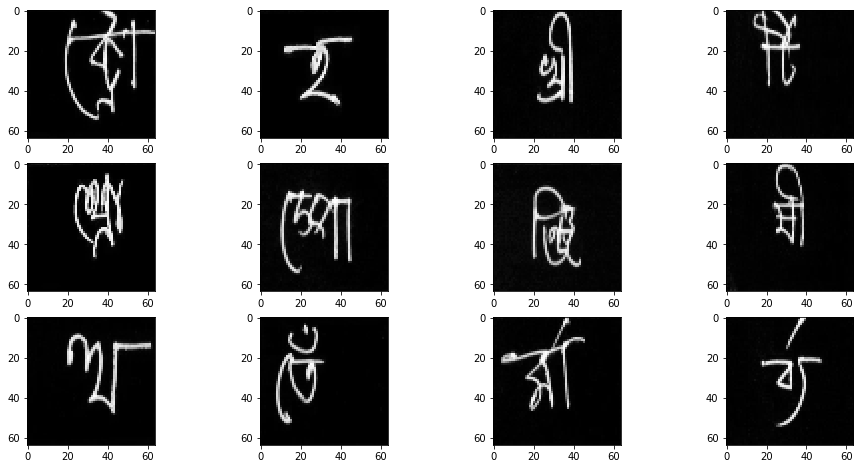

W0205 21:29:03.173381  6732 data_adapter.py:1091] sample_weight modes were coerced from
  {'root': '...', 'vowel': '...', 'consonant': '...'}
    to  
  ['...', '...', '...']


Train for 180 steps, validate on 4017 samples
Epoch 1/32
180/180 [==============================] - 52s 289ms/step - loss: 7.8633 - root_loss: 4.9022 - vowel_loss: 1.7060 - consonant_loss: 1.2550 - root_accuracy: 0.0314 - vowel_accuracy: 0.4621 - consonant_accuracy: 0.6240 - val_loss: 6.4433 - val_root_loss: 4.5153 - val_vowel_loss: 0.9820 - val_consonant_loss: 0.9457 - val_root_accuracy: 0.0401 - val_vowel_accuracy: 0.6540 - val_consonant_accuracy: 0.6632
Epoch 2/32
180/180 [==============================] - 50s 280ms/step - loss: 6.3489 - root_loss: 4.4271 - vowel_loss: 0.9801 - consonant_loss: 0.9416 - root_accuracy: 0.0465 - vowel_accuracy: 0.6522 - consonant_accuracy: 0.6632 - val_loss: 5.5807 - val_root_loss: 4.1744 - val_vowel_loss: 0.6437 - val_consonant_loss: 0.7612 - val_root_accuracy: 0.0632 - val_vowel_accuracy: 0.7670 - val_consonant_accuracy: 0.7102
Epoch 3/32
180/180 [==============================] - 50s 279ms/step - loss: 5.6551 - root_loss: 4.0738 - vowel_loss: 0.8015

Epoch 21/32
180/180 [==============================] - 49s 273ms/step - loss: 1.2015 - root_loss: 0.7907 - vowel_loss: 0.2156 - consonant_loss: 0.1953 - root_accuracy: 0.7614 - vowel_accuracy: 0.9295 - consonant_accuracy: 0.9338 - val_loss: 0.8232 - val_root_loss: 0.5957 - val_vowel_loss: 0.1146 - val_consonant_loss: 0.1109 - val_root_accuracy: 0.8317 - val_vowel_accuracy: 0.9612 - val_consonant_accuracy: 0.9661
Epoch 22/32
180/180 [==============================] - 49s 272ms/step - loss: 1.1899 - root_loss: 0.7757 - vowel_loss: 0.2145 - consonant_loss: 0.1998 - root_accuracy: 0.7651 - vowel_accuracy: 0.9297 - consonant_accuracy: 0.9323 - val_loss: 0.7645 - val_root_loss: 0.5404 - val_vowel_loss: 0.1124 - val_consonant_loss: 0.1115 - val_root_accuracy: 0.8404 - val_vowel_accuracy: 0.9669 - val_consonant_accuracy: 0.9664
Epoch 23/32
180/180 [==============================] - 49s 272ms/step - loss: 1.1424 - root_loss: 0.7442 - vowel_loss: 0.2085 - consonant_loss: 0.1897 - root_accuracy: 

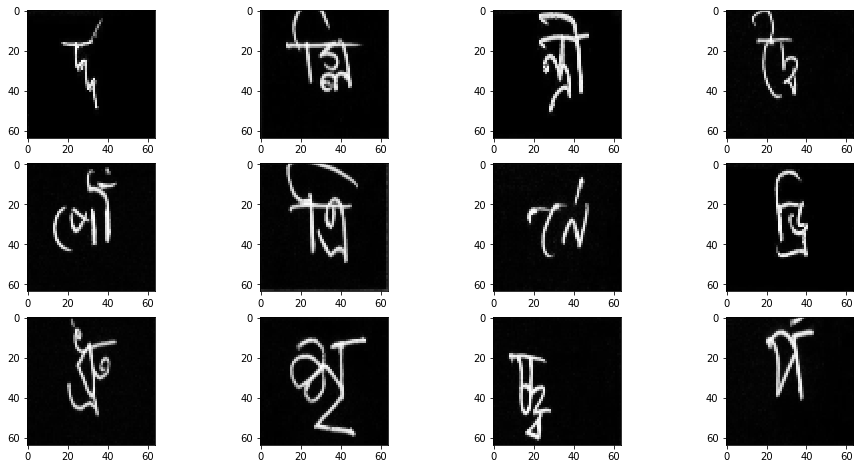

W0205 21:56:25.844974  6732 data_adapter.py:1091] sample_weight modes were coerced from
  {'root': '...', 'vowel': '...', 'consonant': '...'}
    to  
  ['...', '...', '...']


Train for 180 steps, validate on 4017 samples
Epoch 1/32
180/180 [==============================] - 49s 273ms/step - loss: 1.1982 - root_loss: 0.7846 - vowel_loss: 0.2152 - consonant_loss: 0.1984 - root_accuracy: 0.7736 - vowel_accuracy: 0.9327 - consonant_accuracy: 0.9348 - val_loss: 0.6471 - val_root_loss: 0.4433 - val_vowel_loss: 0.1131 - val_consonant_loss: 0.0911 - val_root_accuracy: 0.8693 - val_vowel_accuracy: 0.9676 - val_consonant_accuracy: 0.9726
Epoch 2/32
180/180 [==============================] - 49s 270ms/step - loss: 1.1145 - root_loss: 0.7146 - vowel_loss: 0.2065 - consonant_loss: 0.1934 - root_accuracy: 0.7912 - vowel_accuracy: 0.9364 - consonant_accuracy: 0.9376 - val_loss: 0.6148 - val_root_loss: 0.4296 - val_vowel_loss: 0.0970 - val_consonant_loss: 0.0867 - val_root_accuracy: 0.8696 - val_vowel_accuracy: 0.9711 - val_consonant_accuracy: 0.9731
Epoch 3/32
180/180 [==============================] - 48s 269ms/step - loss: 1.0641 - root_loss: 0.6851 - vowel_loss: 0.1961

Epoch 20/32
180/180 [==============================] - 47s 259ms/step - loss: 0.6276 - root_loss: 0.3909 - vowel_loss: 0.1164 - consonant_loss: 0.1204 - root_accuracy: 0.8789 - vowel_accuracy: 0.9630 - consonant_accuracy: 0.9596 - val_loss: 0.4809 - val_root_loss: 0.3315 - val_vowel_loss: 0.0732 - val_consonant_loss: 0.0759 - val_root_accuracy: 0.9076 - val_vowel_accuracy: 0.9756 - val_consonant_accuracy: 0.9791
Epoch 21/32
180/180 [==============================] - 47s 262ms/step - loss: 0.6269 - root_loss: 0.3859 - vowel_loss: 0.1186 - consonant_loss: 0.1224 - root_accuracy: 0.8784 - vowel_accuracy: 0.9627 - consonant_accuracy: 0.9592 - val_loss: 0.4774 - val_root_loss: 0.3311 - val_vowel_loss: 0.0721 - val_consonant_loss: 0.0749 - val_root_accuracy: 0.9059 - val_vowel_accuracy: 0.9746 - val_consonant_accuracy: 0.9768
Epoch 22/32
180/180 [==============================] - 47s 259ms/step - loss: 0.6183 - root_loss: 0.3833 - vowel_loss: 0.1166 - consonant_loss: 0.1184 - root_accuracy: 

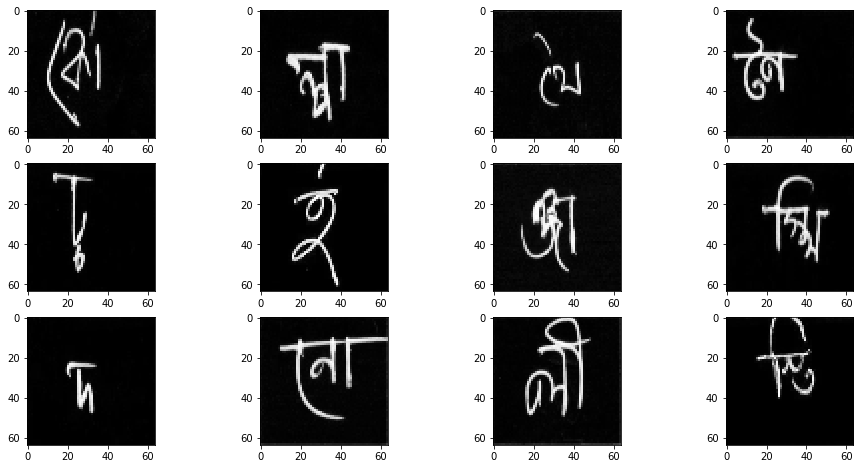

W0205 22:22:40.134840  6732 data_adapter.py:1091] sample_weight modes were coerced from
  {'root': '...', 'vowel': '...', 'consonant': '...'}
    to  
  ['...', '...', '...']


Train for 180 steps, validate on 4017 samples
Epoch 1/32
180/180 [==============================] - 48s 269ms/step - loss: 0.8224 - root_loss: 0.5275 - vowel_loss: 0.1495 - consonant_loss: 0.1454 - root_accuracy: 0.8521 - vowel_accuracy: 0.9542 - consonant_accuracy: 0.9534 - val_loss: 0.3940 - val_root_loss: 0.2461 - val_vowel_loss: 0.0734 - val_consonant_loss: 0.0749 - val_root_accuracy: 0.9196 - val_vowel_accuracy: 0.9813 - val_consonant_accuracy: 0.9806
Epoch 2/32
180/180 [==============================] - 48s 266ms/step - loss: 0.7722 - root_loss: 0.4966 - vowel_loss: 0.1378 - consonant_loss: 0.1378 - root_accuracy: 0.8571 - vowel_accuracy: 0.9576 - consonant_accuracy: 0.9540 - val_loss: 0.3864 - val_root_loss: 0.2447 - val_vowel_loss: 0.0714 - val_consonant_loss: 0.0718 - val_root_accuracy: 0.9221 - val_vowel_accuracy: 0.9813 - val_consonant_accuracy: 0.9801
Epoch 3/32
180/180 [==============================] - 47s 262ms/step - loss: 0.7321 - root_loss: 0.4710 - vowel_loss: 0.1291

Epoch 21/32
180/180 [==============================] - 47s 262ms/step - loss: 0.5436 - root_loss: 0.3388 - vowel_loss: 0.0989 - consonant_loss: 0.1059 - root_accuracy: 0.8942 - vowel_accuracy: 0.9684 - consonant_accuracy: 0.9637 - val_loss: 0.3666 - val_root_loss: 0.2261 - val_vowel_loss: 0.0702 - val_consonant_loss: 0.0717 - val_root_accuracy: 0.9298 - val_vowel_accuracy: 0.9838 - val_consonant_accuracy: 0.9781
Epoch 22/32
180/180 [==============================] - 47s 263ms/step - loss: 0.5308 - root_loss: 0.3313 - vowel_loss: 0.0955 - consonant_loss: 0.1039 - root_accuracy: 0.8963 - vowel_accuracy: 0.9690 - consonant_accuracy: 0.9659 - val_loss: 0.3585 - val_root_loss: 0.2190 - val_vowel_loss: 0.0725 - val_consonant_loss: 0.0683 - val_root_accuracy: 0.9315 - val_vowel_accuracy: 0.9828 - val_consonant_accuracy: 0.9806
Epoch 23/32
180/180 [==============================] - 47s 262ms/step - loss: 0.5302 - root_loss: 0.3349 - vowel_loss: 0.0949 - consonant_loss: 0.1005 - root_accuracy: 

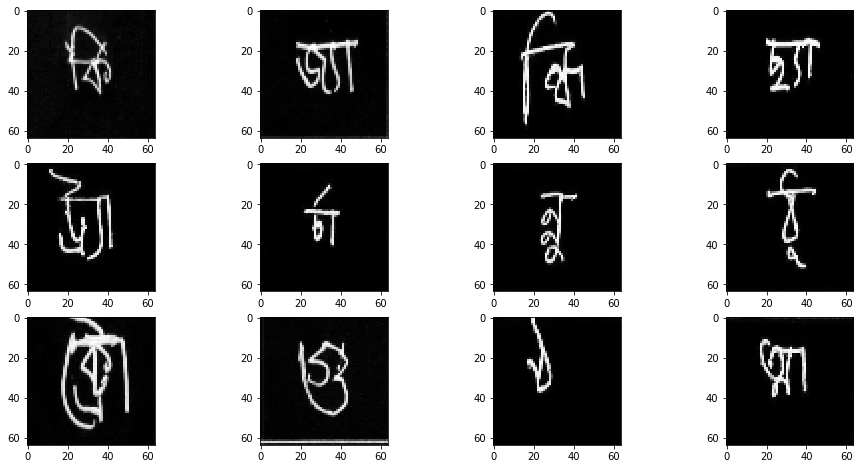

W0205 22:48:52.307854  6732 data_adapter.py:1091] sample_weight modes were coerced from
  {'root': '...', 'vowel': '...', 'consonant': '...'}
    to  
  ['...', '...', '...']


Train for 180 steps, validate on 4017 samples
Epoch 1/32
180/180 [==============================] - 49s 270ms/step - loss: 0.7150 - root_loss: 0.4535 - vowel_loss: 0.1321 - consonant_loss: 0.1294 - root_accuracy: 0.8739 - vowel_accuracy: 0.9604 - consonant_accuracy: 0.9587 - val_loss: 0.3613 - val_root_loss: 0.2546 - val_vowel_loss: 0.0523 - val_consonant_loss: 0.0532 - val_root_accuracy: 0.9251 - val_vowel_accuracy: 0.9876 - val_consonant_accuracy: 0.9851
Epoch 2/32
180/180 [==============================] - 48s 267ms/step - loss: 0.6827 - root_loss: 0.4342 - vowel_loss: 0.1241 - consonant_loss: 0.1245 - root_accuracy: 0.8759 - vowel_accuracy: 0.9636 - consonant_accuracy: 0.9604 - val_loss: 0.3587 - val_root_loss: 0.2534 - val_vowel_loss: 0.0537 - val_consonant_loss: 0.0502 - val_root_accuracy: 0.9263 - val_vowel_accuracy: 0.9878 - val_consonant_accuracy: 0.9863
Epoch 3/32
180/180 [==============================] - 47s 262ms/step - loss: 0.6541 - root_loss: 0.4164 - vowel_loss: 0.1188

Epoch 21/32
180/180 [==============================] - 46s 257ms/step - loss: 0.5275 - root_loss: 0.3281 - vowel_loss: 0.0985 - consonant_loss: 0.1009 - root_accuracy: 0.9011 - vowel_accuracy: 0.9692 - consonant_accuracy: 0.9668 - val_loss: 0.3455 - val_root_loss: 0.2468 - val_vowel_loss: 0.0493 - val_consonant_loss: 0.0493 - val_root_accuracy: 0.9286 - val_vowel_accuracy: 0.9873 - val_consonant_accuracy: 0.9858
Epoch 22/32
180/180 [==============================] - 46s 257ms/step - loss: 0.5207 - root_loss: 0.3262 - vowel_loss: 0.0950 - consonant_loss: 0.0995 - root_accuracy: 0.8994 - vowel_accuracy: 0.9693 - consonant_accuracy: 0.9670 - val_loss: 0.3664 - val_root_loss: 0.2610 - val_vowel_loss: 0.0526 - val_consonant_loss: 0.0523 - val_root_accuracy: 0.9268 - val_vowel_accuracy: 0.9866 - val_consonant_accuracy: 0.9858
Epoch 23/32
180/180 [==============================] - 46s 258ms/step - loss: 0.5096 - root_loss: 0.3189 - vowel_loss: 0.0918 - consonant_loss: 0.0989 - root_accuracy: 

In [23]:
histories = []

#for i in range(4):
for df in [df_0, df_1, df_2, df_3]:
    
    # в данных расопложены пиксели в один ряд размера 32332 (137*236) и значениях 3х классов
    X_train = pd.merge(
        #pd.read_feather(f'\\\\FLAT\\d$\\Python\\Kaggle\\Bengali\\train_image_data_{i}.fth'),
        df,
        train_df,
        on='image_id'
    ).drop(
        labels=['image_id'],
        axis=1
    )
    
    # разворачиваем целевую переменную в одномерный массив, где 1 ставится только в нужном классе (168, 11 или 7)
    Y_train_root = pd.get_dummies(X_train['grapheme_root']).values
    Y_train_vowel = pd.get_dummies(X_train['vowel_diacritic']).values
    Y_train_consonant = pd.get_dummies(X_train['consonant_diacritic']).values
    
    print(f'Training images: {X_train.shape}')
    print(f'Training labels root: {Y_train_root.shape}')
    print(f'Training labels vowel: {Y_train_vowel.shape}')
    print(f'Training labels consonants: {Y_train_consonant.shape}')
    
    # отрисовка данных, сжатых до 4096 пикселей (64*64)
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 8))
    count=0
    
    for row in ax:
        
        for col in row:
            
            col.imshow(
                X=resize(
                    X_train.drop(
                        labels=['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'],
                        axis=1
                    ).iloc[[count]],
                    size=IMG_SIZE
                ).values.reshape(IMG_SIZE, IMG_SIZE).astype(DATA_TYPE),
                cmap='Greys'
            )
            
            count += 1
            
    plt.show()
    
    # переводим в размер 64 на 64 и делим на 255 пикселей
    X_train = X_train.drop(
        labels=['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'],
        axis=1
    )
    X_train = resize(X_train, size=IMG_SIZE)/255

    # приводим к виду количество картинок * высота * ширина * количество каналов
    X_train = X_train.values.reshape(-1, IMG_SIZE, IMG_SIZE, N_CHANNELS)

    # Divide the data into training and validation set
    x_train, x_test, y_train_root, y_test_root, y_train_vowel, y_test_vowel, y_train_consonant, y_test_consonant = \
    sklearn.model_selection.train_test_split(
        X_train,
        Y_train_root,
        Y_train_vowel,
        Y_train_consonant,
        test_size=0.08,
        random_state=0
    )

    del X_train
    del Y_train_root
    del Y_train_vowel
    del Y_train_consonant
    gc.collect()

    # переписанный класс для генерации различных картинок с выводом 3х классов в качестве ответов
    datagen = MultiOutputDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range=.15, # Randomly zoom image 
        width_shift_range=.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False  # randomly flip images
    )

    # This will just calculate parameters required to augment the given data. This won't perform any augmentations
    datagen.fit(x_train)

    # Fit the model
    history = model.fit(
        datagen.flow(
            x_train,
            {
                'root': y_train_root,
                'vowel': y_train_vowel,
                'consonant': y_train_consonant
            },
            batch_size=batch_size
        ),
        epochs=epochs,
        validation_data=(x_test, [y_test_root, y_test_vowel, y_test_consonant]), 
        steps_per_epoch=x_train.shape[0] // batch_size,
        callbacks=[
            callback_lr#,
            #callback_es,
            #CallbackGarbageCollector()            
        ]
    )

    histories.append(history)

    # Delete to reduce memory usage
    del x_train
    del x_test
    del y_train_root
    del y_test_root
    del y_train_vowel
    del y_test_vowel
    del y_train_consonant
    del y_test_consonant
    del history
    gc.collect()

In [32]:
gc.collect()

40

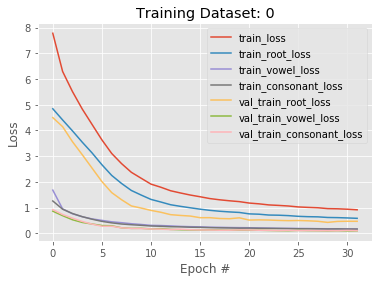

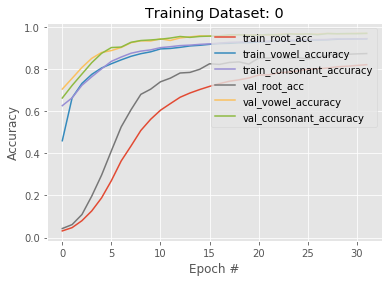

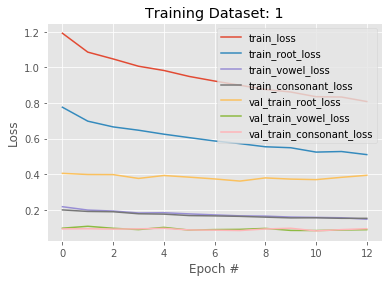

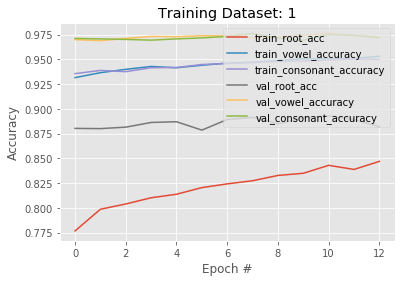

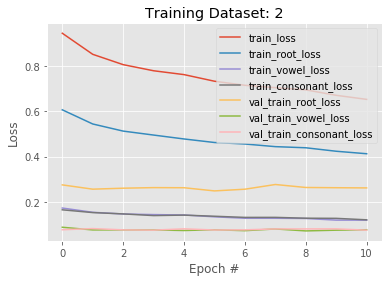

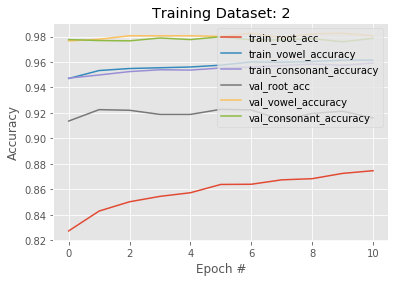

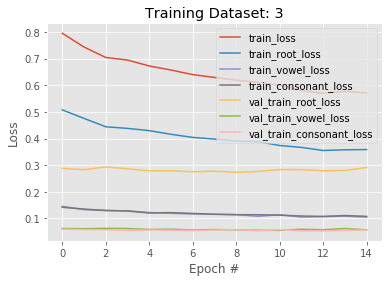

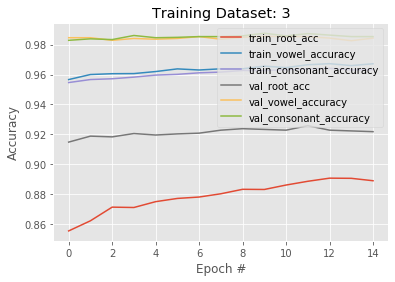

In [49]:
for dataset in range(4):
    plot_loss(histories[dataset], epochs, f'Training Dataset: {dataset}')
    plot_acc(histories[dataset], epochs, f'Training Dataset: {dataset}')

In [50]:
del histories
gc.collect()

30490

# Попробовать Mish() активацию

In [10]:
IMG_SIZE = 64
batch_size = 256
epochs = 32

In [42]:
inputs = tf.keras.layers.Input(
    shape=(IMG_SIZE, IMG_SIZE, 1)
)

#########################################################################################################################
model = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    strides=(1, 1),
    padding='SAME',
    activation=tf_ad.activations.mish,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(inputs)

model = tf.keras.layers.BatchNormalization(
    momentum=.15
)(model)

model = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=None
)(model)

#########################################################################################################################
model = tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='SAME',
    activation=tf_ad.activations.mish,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(model)

model = tf.keras.layers.BatchNormalization(
    momentum=.15
)(model)

model = tf.keras.layers.MaxPool2D(
    pool_size=(1, 1),
    strides=None
)(model)

#########################################################################################################################
model = tf.keras.layers.Flatten()(model)

model = tf.keras.layers.Dense(
    units=1024,
    activation=tf_ad.activations.mish
)(model)

#########################################################################################################################
dense = tf.keras.layers.Dense(
    units=512,
    activation=tf_ad.activations.mish
)(model)

head_root = tf.keras.layers.Dense(
    units=168,
    activation=tf.keras.activations.softmax,
    name='root'
)(dense)

head_vowel = tf.keras.layers.Dense(
    units=11,
    activation=tf.keras.activations.softmax,
    name='vowel'
)(dense)

head_consonant = tf.keras.layers.Dense(
    units=7,
    activation=tf.keras.activations.softmax,
    name='consonant'
)(dense)

#########################################################################################################################
model = tf.keras.Model(
    inputs=inputs,
    outputs=[head_root, head_vowel, head_consonant]
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

callback_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=.5,
    patience=5,
    verbose=1,
    mode='auto',
    min_delta=.0001,
    cooldown=0,
    min_lr=.0001,
)

In [43]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 64, 64, 32)   832         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_13 (BatchNo (None, 64, 64, 32)   128         conv2d_21[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 32, 32, 32)   0           batch_normalization_13[0][0]     
____________________________________________________________________________________________

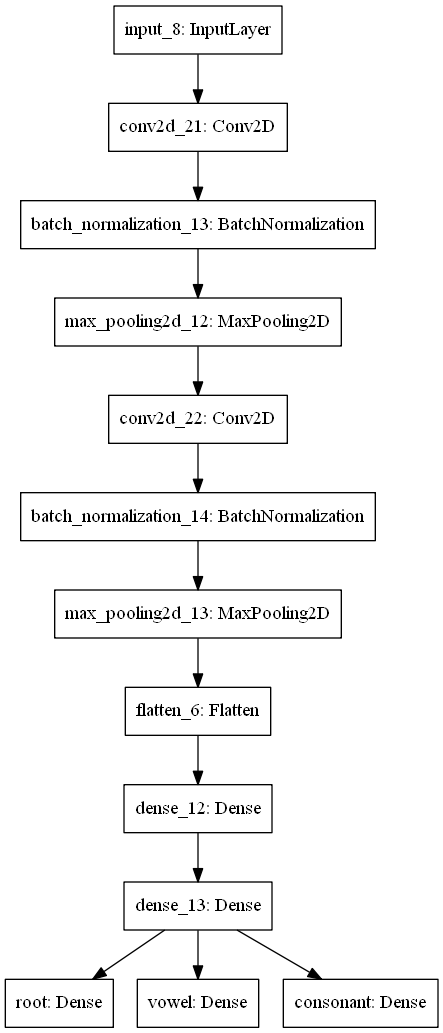

In [44]:
tf.keras.utils.plot_model(model, to_file='model.png')

Training images: (50210, 32335)
Training labels root: (50210, 168)
Training labels vowel: (50210, 11)
Training labels consonants: (50210, 7)


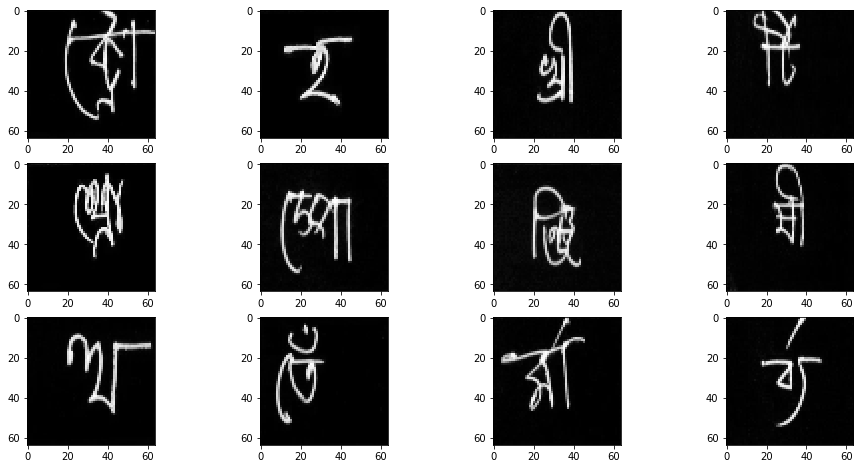

W0207 00:00:39.011155 10504 data_adapter.py:1091] sample_weight modes were coerced from
  {'root': '...', 'vowel': '...', 'consonant': '...'}
    to  
  ['...', '...', '...']


Train for 180 steps, validate on 4017 samples
Epoch 1/32
180/180 [==============================] - 146s 813ms/step - loss: 13.9259 - root_loss: 7.1664 - vowel_loss: 4.3593 - consonant_loss: 2.4002 - root_accuracy: 0.0278 - vowel_accuracy: 0.3373 - consonant_accuracy: 0.5795 - val_loss: 7.4725 - val_root_loss: 4.7114 - val_vowel_loss: 1.5915 - val_consonant_loss: 1.1701 - val_root_accuracy: 0.0388 - val_vowel_accuracy: 0.4414 - val_consonant_accuracy: 0.5599
Epoch 2/32
 14/180 [=>............................] - ETA: 2:05 - loss: 7.4033 - root_loss: 4.6614 - vowel_loss: 1.6200 - consonant_loss: 1.1218 - root_accuracy: 0.0386 - vowel_accuracy: 0.4163 - consonant_accuracy: 0.6122

W0207 00:03:15.913408 10504 callbacks.py:1934] Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,root_loss,vowel_loss,consonant_loss,root_accuracy,vowel_accuracy,consonant_accuracy,lr


KeyboardInterrupt: 

In [45]:
histories = []

#for i in range(4):
for df in [df_0]:#, df_1, df_2, df_3]:
    
    # в данных расопложены пиксели в один ряд размера 32332 (137*236) и значениях 3х классов
    X_train = pd.merge(
        #pd.read_feather(f'\\\\FLAT\\d$\\Python\\Kaggle\\Bengali\\train_image_data_{i}.fth'),
        df,
        train_df,
        on='image_id'
    ).drop(
        labels=['image_id'],
        axis=1
    )
    
    # разворачиваем целевую переменную в одномерный массив, где 1 ставится только в нужном классе (168, 11 или 7)
    Y_train_root = pd.get_dummies(X_train['grapheme_root']).values
    Y_train_vowel = pd.get_dummies(X_train['vowel_diacritic']).values
    Y_train_consonant = pd.get_dummies(X_train['consonant_diacritic']).values
    
    print(f'Training images: {X_train.shape}')
    print(f'Training labels root: {Y_train_root.shape}')
    print(f'Training labels vowel: {Y_train_vowel.shape}')
    print(f'Training labels consonants: {Y_train_consonant.shape}')
    
    # отрисовка данных, сжатых до 4096 пикселей (64*64)
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 8))
    count=0
    
    for row in ax:
        
        for col in row:
            
            col.imshow(
                X=resize(
                    X_train.drop(
                        labels=['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'],
                        axis=1
                    ).iloc[[count]],
                    size=IMG_SIZE
                ).values.reshape(IMG_SIZE, IMG_SIZE).astype(DATA_TYPE),
                cmap='Greys'
            )
            
            count += 1
            
    plt.show()
    
    # переводим в размер 64 на 64 и делим на 255 пикселей
    X_train = X_train.drop(
        labels=['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'],
        axis=1
    )
    X_train = resize(X_train, size=IMG_SIZE)/255

    # приводим к виду количество картинок * высота * ширина * количество каналов
    X_train = X_train.values.reshape(-1, IMG_SIZE, IMG_SIZE, N_CHANNELS)

    # Divide the data into training and validation set
    x_train, x_test, y_train_root, y_test_root, y_train_vowel, y_test_vowel, y_train_consonant, y_test_consonant = \
    sklearn.model_selection.train_test_split(
        X_train,
        Y_train_root,
        Y_train_vowel,
        Y_train_consonant,
        test_size=0.08,
        random_state=0
    )

    del X_train
    del Y_train_root
    del Y_train_vowel
    del Y_train_consonant
    gc.collect()

    # переписанный класс для генерации различных картинок с выводом 3х классов в качестве ответов
    datagen = MultiOutputDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range=.10, # Randomly zoom image 
        width_shift_range=.10,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=.10,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False  # randomly flip images
    )

    # This will just calculate parameters required to augment the given data. This won't perform any augmentations
    datagen.fit(x_train)

    # Fit the model
    history = model.fit(
        datagen.flow(
            x_train,
            {
                'root': y_train_root,
                'vowel': y_train_vowel,
                'consonant': y_train_consonant
            },
            batch_size=batch_size
        ),
        epochs=epochs,
        validation_data=(x_test, [y_test_root, y_test_vowel, y_test_consonant]), 
        steps_per_epoch=x_train.shape[0] // batch_size, 
        callbacks=[
            callback_lr
        ]
    )

    histories.append(history)
    
    # Delete to reduce memory usage
    del x_train
    del x_test
    del y_train_root
    del y_test_root
    del y_train_vowel
    del y_test_vowel
    del y_train_consonant
    del y_test_consonant
    gc.collect()

# Попробовать уже натренированную модель

# Попробовать клонировать слои в 3х мерный вид

In [47]:
from efficientnet.keras import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

21831680/21826536 [==============================] - 9s 0us/step


In [48]:
model.summary()

Model: "efficientnet-b0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 32) 864         input_9[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 32) 0           stem_bn[0][0]                    
____________________________________________________________________________________

In [ ]:
# нужно клонировать слои, менять размер и уже потом использовать загруженную сеть

# Попробовать Слои внимания

# Дебаг через класс

In [107]:
class BengaliModel:
    """
    This is class that train model with batch size, number epochs, callbacks, image size and image generator you pass.
    """
    def __init__(
        self,
        model,
        img_size,
        epochs,
        batch_size,
        img_preproc,
        callbacks,
        dfs,
        train_df
    ):
        self._model = model
        self._img_size = img_size
        self._epochs = epochs
        self._batch_size = batch_size
        self._callbacks = callbacks
        self._img_preproc = img_preproc
        self._callbacks = callbacks
        self._dfs = dfs
        self._train_df = train_df
        
    @property
    def model(self):
        return self._model
    
    @model.setter
    def model(self, value):
        self._model = value
        
    @property
    def img_size(self):
        return self._img_size
    
    @img_size.setter
    def img_size(self, value):
        self._img_size = value
        
    @property
    def epochs(self):
        return self._epochs
    
    @epochs.setter
    def epochs(self, value):
        self._epochs = value
        
    @property
    def batch_size(self):
        return self._batch_size
    
    @batch_size.setter
    def batch_size(self, value):
        self._batch_size = value
        
    @property
    def img_preproc(self):
        return self._img_preproc
    
    @img_preproc.setter
    def img_preproc(self, value):
        self._img_preproc = value
        
    @property
    def callbacks(self):
        return self._callbacks
    
    @callbacks.setter
    def callbacks(self, value):
        self._callbacks = value
        
    @property
    def dfs(self):
        return self._dfs
    
    @dfs.setter
    def dfs(self, value):
        self._dfs = value
        
    @property
    def train_df(self):
        return self._train_df
    
    @train_df.setter
    def train_df(self, value):
        self._train_df = value
        
    @property
    def histories(self):
        return self._histories
    
    @histories.setter
    def histories(self, value):
        self._histories = value
        
    # функция для изменения размера картинки
    @jit
    def resize(df, size):
        resized = {}
        
        for i in range(df.shape[0]):
            
            image = cv2.resize(df.loc[df.index[i]].values.reshape(137,236),(size,size))
            resized[df.index[i]] = image.reshape(-1)
                
        resized = pd.DataFrame(resized).T
        return resized
        
    def main(self):
        
        histories = []

        for df in self.dfs:

            # в данных расопложены пиксели в один ряд размера 32332 (137*236) и значениях 3х классов
            X_train = pd.merge(
                df,
                self.train_df,
                on='image_id'
            ).drop(
                labels=['image_id'],
                axis=1
            )

            # разворачиваем целевую переменную в одномерный массив, где 1 ставится только в нужном классе (168, 11 или 7)
            Y_train_root = pd.get_dummies(X_train['grapheme_root']).values
            Y_train_vowel = pd.get_dummies(X_train['vowel_diacritic']).values
            Y_train_consonant = pd.get_dummies(X_train['consonant_diacritic']).values

            print(f'Training images: {X_train.shape}')
            print(f'Training labels root: {Y_train_root.shape}')
            print(f'Training labels vowel: {Y_train_vowel.shape}')
            print(f'Training labels consonants: {Y_train_consonant.shape}')

            # отрисовка данных, сжатых до 4096 пикселей (64*64)
            fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 8))
            count=0

            for row in ax:

                for col in row:

                    col.imshow(
                        X=resize(
                            X_train.drop(
                                labels=['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'],
                                axis=1
                            ).iloc[[count]],
                            size=self.img_size
                        ).values.reshape(self.img_size, self.img_size).astype(np.float64),
                        cmap='Greys'
                    )

                    count += 1

            plt.show()

            # переводим в размер 64 на 64 и делим на 255 пикселей
            X_train = X_train.drop(
                labels=['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'],
                axis=1
            )
            X_train = resize(X_train, size=IMG_SIZE)/255

            # приводим к виду количество картинок * высота * ширина * количество каналов
            X_train = X_train.values.reshape(-1, self.imf_size, self.imf_size, N_CHANNELS)

            # Divide the data into training and validation set
            x_train, x_test, y_train_root, y_test_root, y_train_vowel, y_test_vowel, y_train_consonant, y_test_consonant = \
            sklearn.model_selection.train_test_split(
                X_train,
                Y_train_root,
                Y_train_vowel,
                Y_train_consonant,
                test_size=0.08,
                random_state=0
            )

            del X_train
            del Y_train_root
            del Y_train_vowel
            del Y_train_consonant
            gc.collect()

            # This will just calculate parameters required to augment the given data. This won't perform any augmentations
            self.img_preproc.fit(x_train)

            # Fit the model
            history = self.model.fit(
                img_preproc.flow(
                    x_train,
                    {
                        'root': y_train_root,
                        'vowel': y_train_vowel,
                        'consonant': y_train_consonant
                    },
                    batch_size=self.batch_size
                ),
                epochs=self.epochs,
                validation_data=(x_test, [y_test_root, y_test_vowel, y_test_consonant]), 
                steps_per_epoch=x_train.shape[0] // batch_size, 
                callbacks=self.callbacks
            )

            histories.append(history)

            # Delete to reduce memory usage
            del x_train
            del x_test
            del y_train_root
            del y_test_root
            del y_train_vowel
            del y_test_vowel
            del y_train_consonant
            del y_test_consonant
            gc.collect()

In [85]:
inputs = tf.keras.layers.Input(
    shape=(IMG_SIZE, IMG_SIZE, 1)
)

#########################################################################################################################
model = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    strides=(2, 2),
    padding='SAME',
    activation=None,
    input_shape=(IMG_SIZE, IMG_SIZE, 1)
)(inputs)

model = tf.keras.layers.BatchNormalization(
    momentum=.15
)(model)

model = tf.keras.layers.Activation(
    activation=tf.keras.activations.relu
)(model)

model = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=None
)(model)

#model = tf.keras.layers.Dropout(
#    rate=.3
#)(model)

#########################################################################################################################
model = tf.keras.layers.Flatten()(model)

model = tf.keras.layers.Dense(
    units=2048,
    activation=tf.keras.activations.relu
)(model)

model = tf.keras.layers.Dense(
    units=1024,
    activation=tf.keras.activations.relu
)(model)

#model = tf.keras.layers.Dropout(
#    rate=0.3
#)(model)

#########################################################################################################################
dense = tf.keras.layers.Dense(
    units=512,
    activation = tf.keras.activations.relu
)(model)

head_root = tf.keras.layers.Dense(
    units=168,
    activation=tf.keras.activations.softmax,
    name='root'
)(dense)

head_vowel = tf.keras.layers.Dense(
    units=11,
    activation=tf.keras.activations.softmax,
    name='vowel'
)(dense)

head_consonant = tf.keras.layers.Dense(
    units=7,
    activation=tf.keras.activations.softmax,
    name='consonant'
)(dense)

#########################################################################################################################
model = tf.keras.Model(
    inputs=inputs,
    outputs=[head_root, head_vowel, head_consonant]
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

callback_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=.5,
    patience=5,
    verbose=1,
    mode='auto',
    min_delta=.0001,
    cooldown=0,
    min_lr=.0001,
)

callback_es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

Training images: (50210, 32335)
Training labels root: (50210, 168)
Training labels vowel: (50210, 11)
Training labels consonants: (50210, 7)


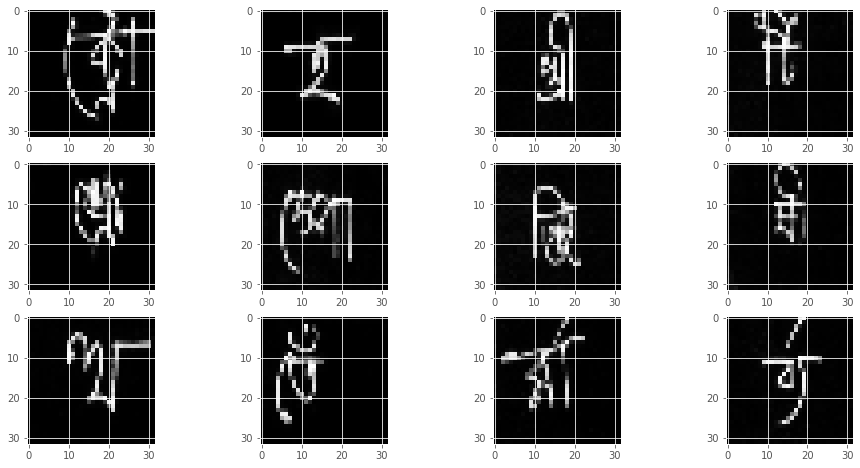

MemoryError: 

In [106]:
gc.collect()

datagen = MultiOutputDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=.10, # Randomly zoom image 
    width_shift_range=.10,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=.10,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False  # randomly flip images
)

test = \
BengaliModel(
    model=model,
    img_size=128,
    epochs=32,
    batch_size=256,
    img_preproc=datagen,
    callbacks=[callback_lr, callback_es],
    dfs=[df_0, df_1, df_2, df_3],
    train_df=train_df,
)

test.main()

# Предсказание

In [51]:
preds_dict = {
    'grapheme_root': [],
    'vowel_diacritic': [],
    'consonant_diacritic': []
}

components = ['consonant_diacritic', 'grapheme_root', 'vowel_diacritic']
target=[] # model predictions placeholder
row_id=[] # row_id place holder

for i in range(4):
    
    df_test_img = pd.read_parquet('\\\\FLAT\\d$\\Python\\Kaggle\\Bengali\\test_image_data_{}.parquet'.format(i)) 
    df_test_img.set_index('image_id', inplace=True)

    X_test = resize(df_test_img, size=IMG_SIZE)/255
    X_test = X_test.values.reshape(-1, IMG_SIZE, IMG_SIZE, N_CHANNELS)

    preds = model.predict(X_test)
    
    for i, p in enumerate(preds_dict):
        
        preds_dict[p] = np.argmax(preds[i], axis=1)

    for k, id in enumerate(df_test_img.index.values):  
        
        for i, comp in enumerate(components):
            
            id_sample = id + '_' + comp
            row_id.append(id_sample)
            target.append(preds_dict[comp][k])
            
    del df_test_img
    del X_test
    gc.collect()

df_sample = pd.DataFrame(
    {
        'row_id': row_id,
        'target':target
    },
    columns = ['row_id','target'] 
)
#df_sample.to_csv('submission.csv',index=False)
df_sample.head()

ValueError: Error when checking input: expected input_9 to have shape (224, 224, 3) but got array with shape (64, 64, 1)